<a href="https://colab.research.google.com/github/Aledelp/Comparative-Image-Noise-Filtering-ClassicVsAI/blob/main/TFG_ALEJANDRO_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFG 2023 - ALEJANDRO DEL POZO

## Análisis en 1D - Funciones prueba 

Pulso cuadrado:

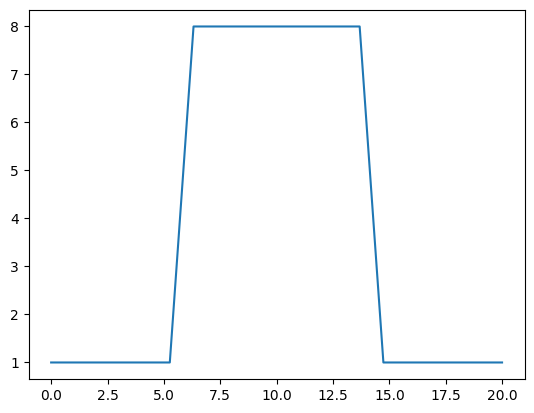

In [ ]:
import numpy as np
from matplotlib import pyplot as mpl
from matplotlib.pyplot import plot,show,xlim,ylim

x= np.linspace(0,20,20)
y= [1,1,1,1,1,1,8,8,8,8,8,8,8,8,1,1,1,1,1,1]



mpl.plot(x,y)
mpl.show()

Introducimos el código que hace la TDF:

In [ ]:
from numpy import zeros
from cmath import exp, pi
def dft(y):
    N=len(y)
    c=np.zeros(N//2 + 1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*exp(-2j*pi*k*n/N)
    return c

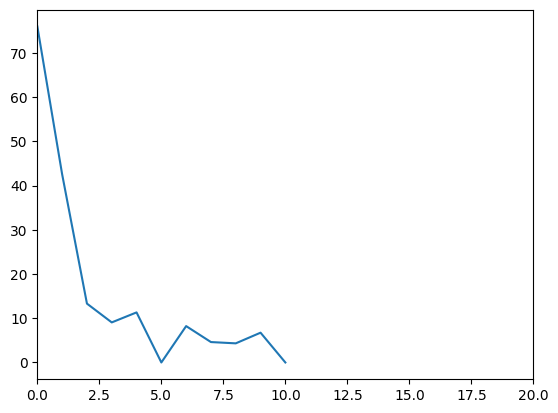

In [ ]:
c = dft(y)
plot(abs(c))
xlim(0,20)
show()

Función seno:

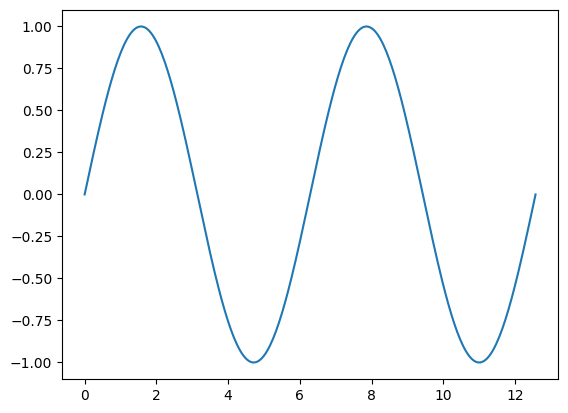

In [ ]:
x= np.linspace(0,4*np.pi,300)
y= np.sin(x)


mpl.plot(x,y)
mpl.show()

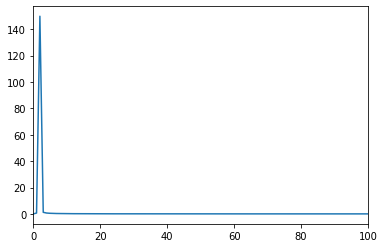

In [ ]:
d = dft(y)
plot(abs(d))
xlim(0,100)
show()

Función gaussiana:

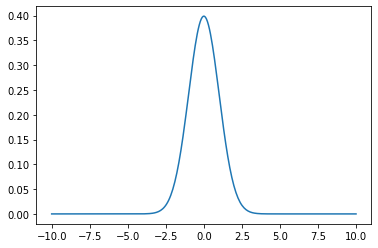

In [ ]:
import scipy as sp
from scipy import stats
x= np.linspace(-10,10,300)
s= stats.norm.pdf(x, 0, 1)



mpl.plot(x,s)
mpl.show()

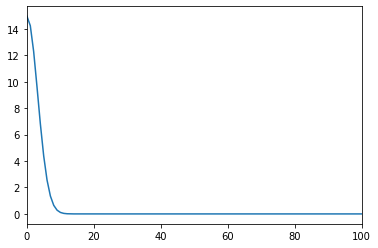

In [ ]:
ms = dft(s)
plot(abs(ms))
xlim(0,100)
show()

In [ ]:
ss = np.fft.ifft(ms)

Simulamos "ruido" como una función de valores aleatorios:

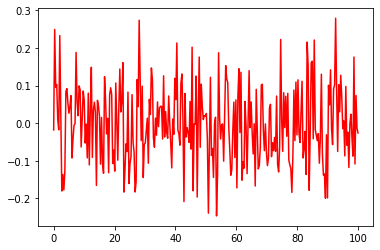

In [ ]:
import random
r =[random.gauss(0,0.1) for i in range(300)]
x= np.linspace(0,100,300)

mpl.plot(x,r,'r')
mpl.show()



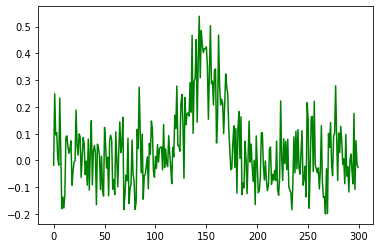

In [ ]:
plot(s+r,'g');

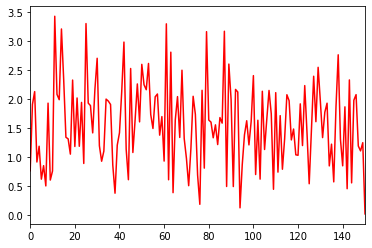

In [ ]:
mr = dft(r)
plot(abs(mr),'r')
xlim(0,150)
show()

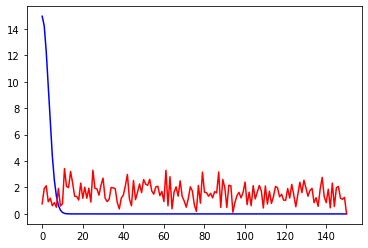

In [ ]:
msr = dft(s+r)
plot(abs(ms),'b')
plot(abs(mr),'r');

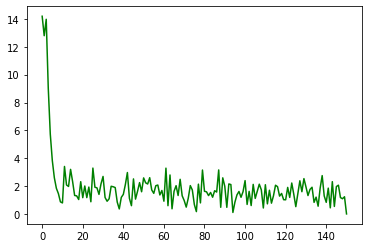

In [ ]:
plot(abs(msr),'g');

ELIMINAMOS TODAS LAS FRECUENCIAS A PARTIR DE UN CIERTO VALOR (DOMINADAS POR EL RUIDO)

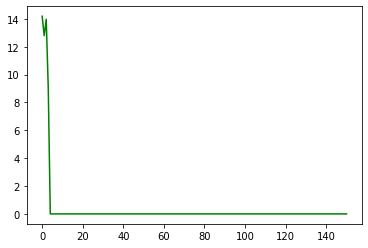

In [ ]:
msr[4:] = 0
plot(abs(msr),'g');

DESHACEMOS LA TRANSFORMADA

A continuación estudiaremos la inversa de la TDF, para ello utilizaremos la función **numpy.fft.ifft** es una función que calcula la transformada discreta de **Fourier inversa de una dimensión**. Es la función inversa de numpy.fft. La función toma un arreglo de entrada y devuelve un arreglo de salida.

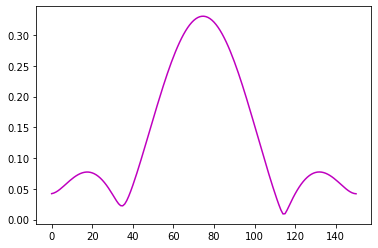

In [ ]:
dmsr = np.fft.ifft(msr)
plot(abs(dmsr),'m');


Como podemos observar, la función obtenida **no es exactamente la gausiana original**. Por un lado porque la **normalización** **no** ha sido **consistente** y en segundo lugar y más importante porque **al haber truncado** msr para eliminar el ruido **hemos** seleccionado y **eliminado frecuencias específicas** si y otras no por lo que eso explica esos "saltos" de la gausiana señal.

 Introducción de la librería FFT

https://docs.scipy.org/doc/scipy/tutorial/fft.html

VER TAMBIEN 
https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html


A continuación, pruebo a hacer la transformada de fourier del primer perfil pero añadiendo ruido, además, esta vez con la librería FFT.


In [ ]:
import numpy as np
from matplotlib import pyplot as mpl
from matplotlib.pyplot import plot,show,xlim,ylim
import random

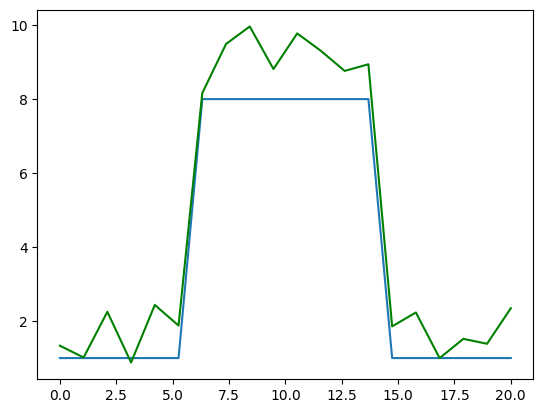

In [ ]:


r =[random.gauss(1,1) for i in range(20)]
a= np.linspace(0,20,20)

x= np.linspace(0,20,20)
esc= [1,1,1,1,1,1,8,8,8,8,8,8,8,8,1,1,1,1,1,1]


escr = np.add(r, esc)


mpl.plot(x,esc)
mpl.plot(a,escr,'g')
mpl.show()



In [ ]:
from scipy.fft import fft
fesc = fft(esc)
fr = fft(r)
fescr = fft(escr)
plot(abs(fescr),'g')
xlim(0,20)
show()

NameError: ignored

Truncamos ahora los valores de ruido, aproximádamente aquellos de frecuencia inferior a 2 y deshacemos la transformada de fourier

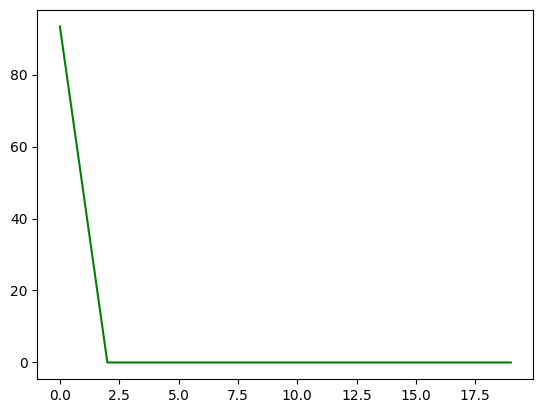

In [ ]:
fescr[2:] = 0
fescrtr=fescr
plot(abs(fescrtr),'g');

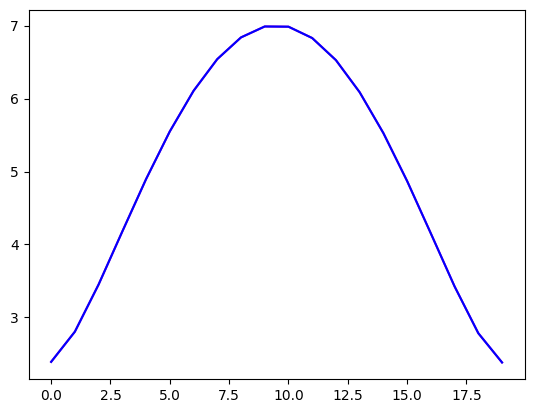

In [ ]:
escrn = np.fft.ifft(fescr)
escrntr = np.fft.ifft(fescrtr)
plot(abs(escrn),'m');
plot(abs(escrntr),'b');
#Recuerda correr la caja anterior al truncado para no perder escr

Podemos probar con el perfil seno de igual manera:

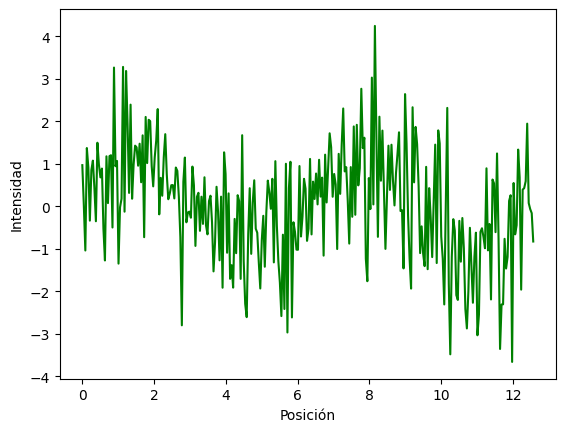

In [ ]:
x= np.linspace(0,4*np.pi,300)
r =[random.gauss(0,1) for i in range(300)]
si= np.sin(x)



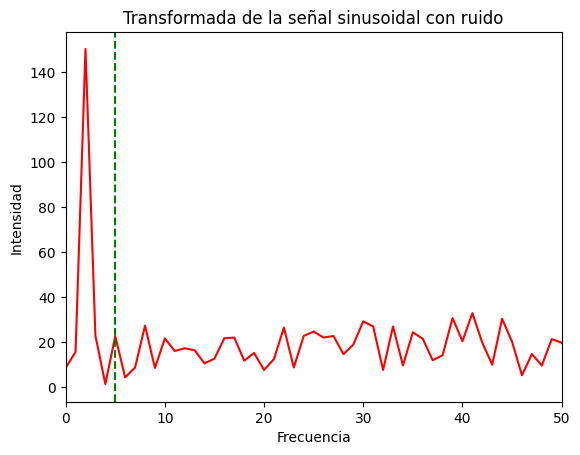

In [ ]:
fsi = fft(si)
fsir = fft(r+si)
#plot(abs(fsi),'r')
plot(abs(fsir),'r')

plt.axvline(x=5, color='g', linestyle='--')
xlim(0,50)
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 16,
        }
plt.title('Transformada de la señal sinusoidal con ruido');



Truncamos en 4 aproximadamente y deshacemos la transformada de fourier

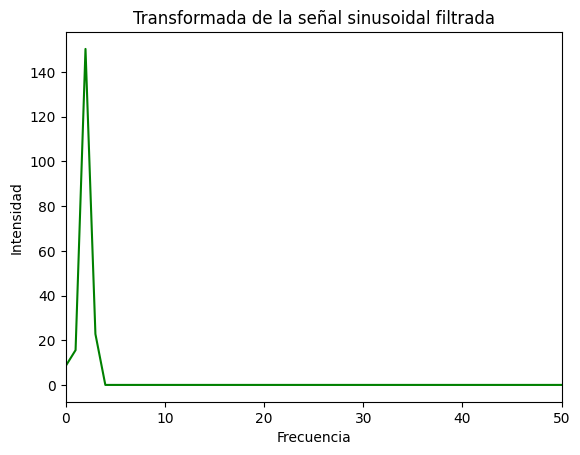

In [ ]:
fsirtr=np.copy(fsir)
fsirtr[4:]=0
plt.xlim(0,50)
plot(abs(fsirtr),'g');
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 16,
        }
plt.title('Transformada de la señal sinusoidal filtrada');
mpl.xlabel('Frecuencia')
mpl.ylabel('Intensidad')
mpl.show()
show()

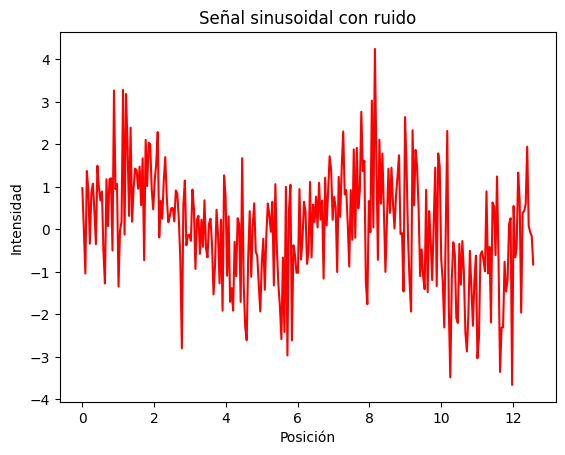

In [ ]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
si2 = np.fft.ifft(fsir);
sirtr2 = np.fft.ifft(fsirtr);
plot(x,si2,'r')
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 16,
        }
plt.title('Señal sinusoidal con ruido');
mpl.xlabel('Posición')
mpl.ylabel('Intensidad')
mpl.show()
show()
#plt.savefig('Señalconruido.png', dpi=300, bbox_inches='tight')

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


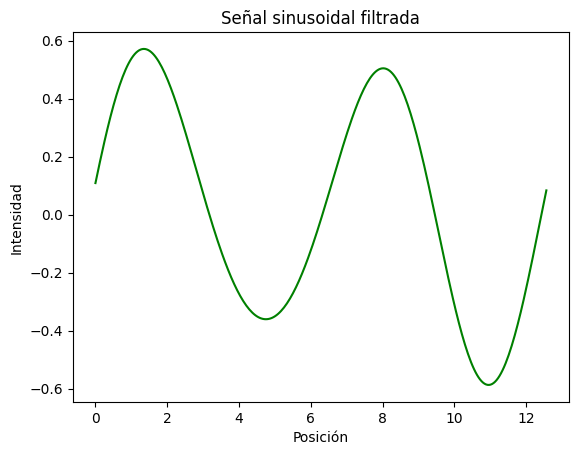

In [ ]:

plot(x,sirtr2,'g');
#plot(x,si,'r');
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 16,
        }
plt.title('Señal sinusoidal filtrada');
mpl.xlabel('Posición')
mpl.ylabel('Intensidad')
mpl.show()
show()
#Recuerda correr la caja anterior al truncado para no perder fsir

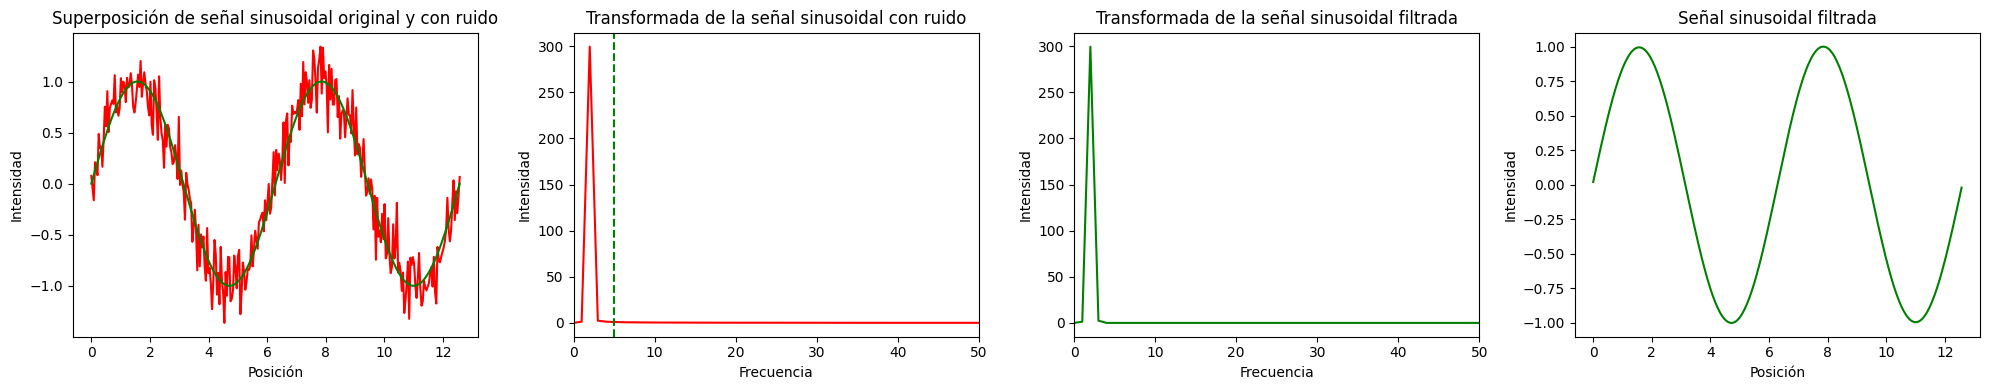

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

x = np.linspace(0, 4 * np.pi, 300)
r = [random.gauss(0, 0.2) for i in range(300)]
si = np.sin(x)

# Crear una figura con tamaño personalizado
fig = plt.figure(figsize=(20, 4))

# Primer plot
ax1 = fig.add_subplot(141)
ax1.plot(x, r + si, 'r')
ax1.plot(x, si, 'g')
ax1.set_xlabel('Posición')
ax1.set_ylabel('Intensidad')
ax1.set_title('Superposición de señal sinusoidal original y con ruido')


# Segundo plot
ax2 = fig.add_subplot(142)
fsi = np.fft.fft(si)
fsir = np.fft.fft(si*2)
ax2.plot(abs(fsir), 'r')
ax2.axvline(x=5, color='g', linestyle='--')
ax2.set_xlim(0, 50)
ax2.set_title('Transformada de la señal sinusoidal con ruido')
ax2.set_xlabel('Frecuencia')
ax2.set_ylabel('Intensidad')

# Tercer plot
ax3 = fig.add_subplot(143)
fsirtr = np.copy(fsir)
fsirtr[4:] = 0
ax3.set_xlim(0, 50)
ax3.plot(abs(fsirtr), 'g')
ax3.set_title('Transformada de la señal sinusoidal filtrada')
ax3.set_xlabel('Frecuencia')
ax3.set_ylabel('Intensidad')

# Cuarto plot
ax4 = fig.add_subplot(144)
si2 = np.fft.ifft(fsi)
sirtr2 = np.fft.ifft(fsirtr)
ax4.plot(x, sirtr2, 'g')
ax4.set_title('Señal sinusoidal filtrada')
ax4.set_xlabel('Posición')
ax4.set_ylabel('Intensidad')

# Ajustar el diseño de los subplots
fig.tight_layout()

# Guardar la imagen en formato PNG
plt.savefig('señal_con_ruido.png', dpi=300, bbox_inches='tight')

# Mostrar la figura
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


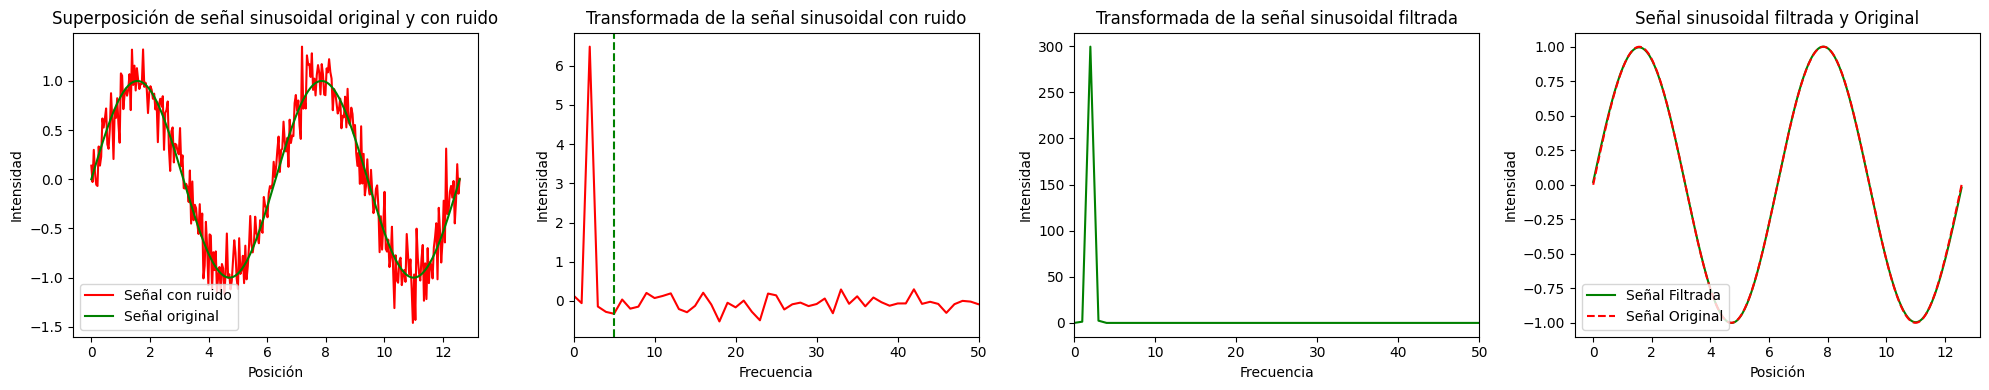

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

x = np.linspace(0, 4 * np.pi, 300)
r = [random.gauss(0, 0.2) for i in range(300)]
si = np.sin(x)
fig = plt.figure(figsize=(20, 4))

# Primer plot
ax1 = fig.add_subplot(141)
ax1.plot(x, (r + si), 'r', label='Señal con ruido')
ax1.plot(x, si, 'g', label='Señal original')
ax1.set_xlabel('Posición')
ax1.set_ylabel('Intensidad')
ax1.set_title('Superposición de señal sinusoidal original y con ruido')
ax1.legend(loc='lower left') 

# Segundo plot
ax2 = fig.add_subplot(142)
fsi = np.fft.fft(si)*2
fsir = np.fft.fft(r + si)
ax2.plot(fsi + r, 'r')
ax2.axvline(x=5, color='g', linestyle='--')
ax2.set_xlim(0, 50)
ax2.set_title('Transformada de la señal sinusoidal con ruido')
ax2.set_xlabel('Frecuencia')
ax2.set_ylabel('Intensidad')

# Tercer plot
ax3 = fig.add_subplot(143)
fsirtr = np.copy(fsi)
fsirtr[4:] = 0
ax3.set_xlim(0, 50)
ax3.plot(abs(fsirtr), 'g')
ax3.set_title('Transformada de la señal sinusoidal filtrada')
ax3.set_xlabel('Frecuencia')
ax3.set_ylabel('Intensidad')

# Cuarto plot
ax4 = fig.add_subplot(144)
sirtr2 = np.fft.ifft(fsirtr)
ax4.plot(x, sirtr2, 'g', label='Señal Filtrada')  
ax4.plot(x, si, 'r', linestyle='dashed', label='Señal Original')  
ax4.set_title('Señal sinusoidal filtrada y Original')
ax4.set_xlabel('Posición')
ax4.set_ylabel('Intensidad')
ax4.legend(loc='lower left')

fig.tight_layout()

plt.savefig('señal_con_ruido.png', dpi=300, bbox_inches='tight')

plt.show()



/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


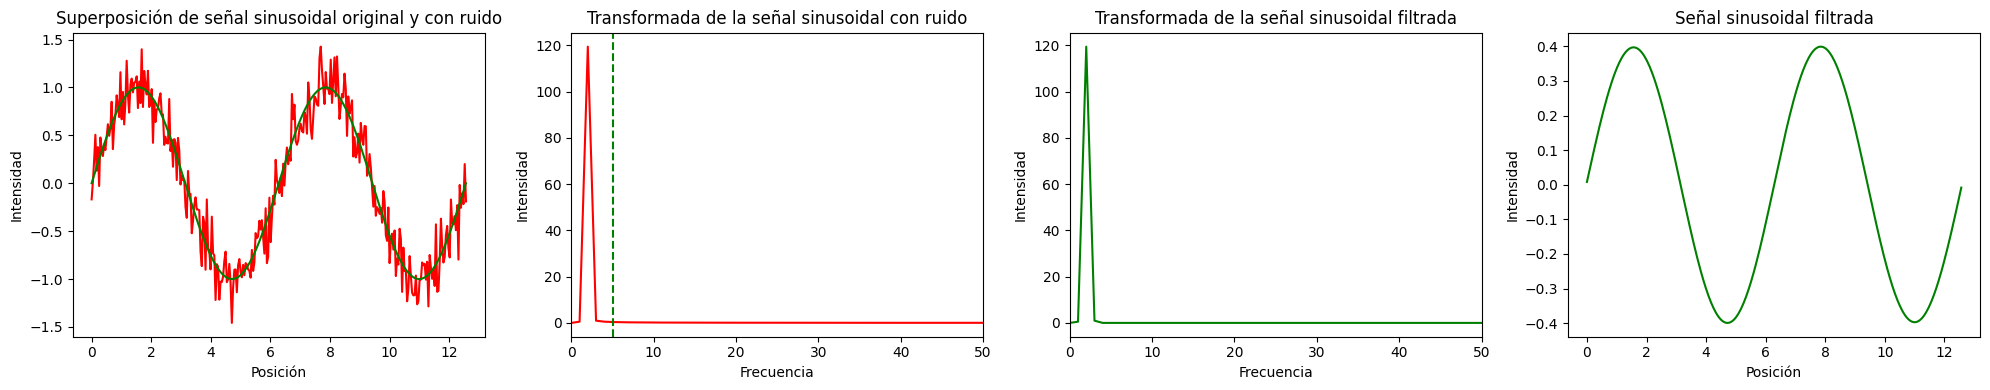

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

x = np.linspace(0, 4 * np.pi, 300)
r = [random.gauss(0, 0.2) for i in range(300)]
si = np.sin(x)

# Crear una figura con tamaño personalizado
fig = plt.figure(figsize=(20, 4))

# Primer plot
ax1 = fig.add_subplot(141)
ax1.plot(x, r + si, 'r')
ax1.plot(x, si, 'g')
ax1.set_xlabel('Posición')
ax1.set_ylabel('Intensidad')
ax1.set_title('Superposición de señal sinusoidal original y con ruido')


# Segundo plot
ax2 = fig.add_subplot(142)
fsi = np.fft.fft(si)
fsir = np.fft.fft(si+r) #r +
ax2.plot(abs(fsir), 'r')
ax2.axvline(x=5, color='g', linestyle='--')
ax2.set_xlim(0, 50)
ax2.set_title('Transformada de la señal sinusoidal con ruido')
ax2.set_xlabel('Frecuencia')
ax2.set_ylabel('Intensidad')

# Tercer plot
ax3 = fig.add_subplot(143)
fsirtr = np.copy(fsir)
fsirtr[4:] = 0
ax3.set_xlim(0, 50)
ax3.plot(abs(fsirtr), 'g')
ax3.set_title('Transformada de la señal sinusoidal filtrada')
ax3.set_xlabel('Frecuencia')
ax3.set_ylabel('Intensidad')

# Cuarto plot
ax4 = fig.add_subplot(144)
si2 = np.fft.ifft(fsi)
sirtr2 = np.fft.ifft(fsirtr)
ax4.plot(x, sirtr2, 'g')
ax4.set_title('Señal sinusoidal filtrada')
ax4.set_xlabel('Posición')
ax4.set_ylabel('Intensidad')

# Ajustar el diseño de los subplots
fig.tight_layout()

# Guardar la imagen en formato PNG
plt.savefig('señal_con_ruido.png', dpi=300, bbox_inches='tight')

# Mostrar la figura
plt.show()



In [ ]:
fig.tight_layout()


<Figure size 640x480 with 0 Axes>

Como podemos comprobar, en azul obtenemos la función seno más o menos recuperada en comparación a si no hubiésemos truncado el ruido, sin embargo no es exáctamente como la original.

## Análisis en **2D - IMAGENES** (NO SE INCLUYE EN EL TFG)


https://github.com/mpizenberg/fft2d

In [ ]:
from __future__ import division             # hace que se utilice la división en punto flotante
import numpy as np                          
import matplotlib.pyplot as plt             
from PIL import Image                      
from numpy.fft import fft2, fftshift, ifft2 


In [ ]:
%matplotlib inline 


Empezamos creando una imagen periódica de tamaño  (601,1201)
 . El periodo,  10.5
 , aparece en la dirección horizontal. En vertical, la imagen es constante:

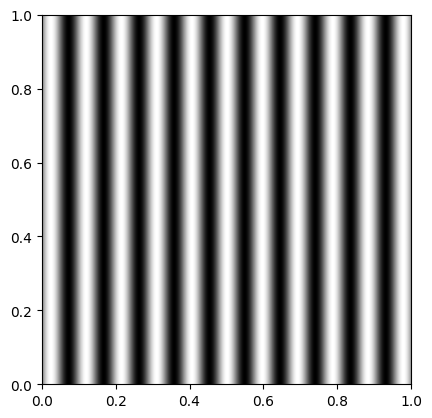

In [ ]:
hW, hH = 600, 300    
hFrec = 10.5     

# Crea una malla en el cuadrado de dimensiones [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW +1), 2*hW+1)     # columnas (Anchura) (recordamos que linespace es (start,stop, n de puntos))
y = np.linspace( 0, 2*hH/(2*hH +1), 2*hH+1)     # filas    (Altura)

[X,Y] = np.meshgrid(x,y)
A = np.sin(hFrec*2*np.pi*X)

plt.imshow(A, extent=[0,1,0,1], cmap ='gray' ); #Comando para representar en 2D, extent acota el rango y cmap el rango de colores
H,W = np.shape(A)   # Dimensiones de la imagen A


Si entendemos que estamos representando la función  A=f(X,Y)
  como una superficie, un corte por un plano paralelo al plano  OXZ
  de dicha superficie sería

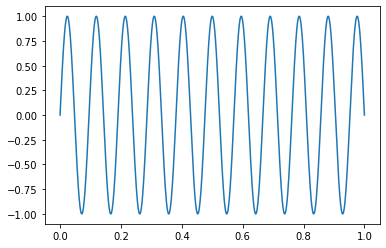

In [ ]:
xx = np.linspace(0,1,1200)
plt.plot(xx,np.sin(hFrec*2*np.pi*xx))
plt.show()

que es una función periódica de frecuencia  f=10.5
  Hz y periodo  T=1/f

In [ ]:
print ("T = ", 1./hFrec)

T =  0.09523809523809523


El paso siguiente es calcular la DFT centrada en el origen y mostrar la figura del espectro de potencia (su raíz cuadrada).

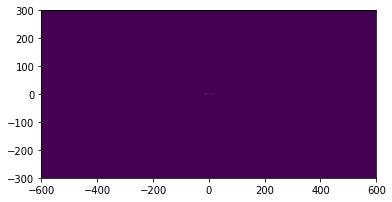

In [ ]:
F = fft2(A)/(W*H)                          
F = fftshift(F)
P = np.abs(F)                            
plt.imshow(P, extent = [-hW,hW,-hH,hH]);

Hacemos zoom (nos acercamos) para ver mejor los valores altos de  P
  a las frecuenccias  ±hFreq. Esto es porque al hacer la transformada vemos que hay mucha indormación que es poco relevante, de hecho ocurre en la mayoría de las imágenes.

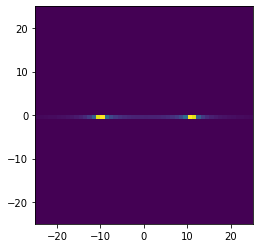

In [ ]:
plt.imshow(P[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]); #Aqui los corchetes "slice" la matriz P y de igual manera consideramos el rango con extent

Si cortamos la superficie representada por un plano vertical que contenga el eje  OX
  tenemos

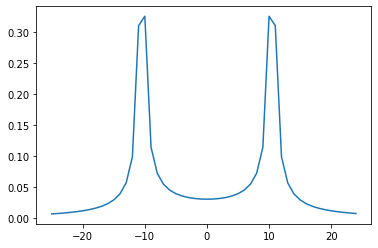

In [ ]:
plt.plot(range(-25,25),P[hH,hW-25:hW+25])
plt.show()
#plt.plot(range(-25,25),P[hH-25:hH+25,hW]) #Esto es en el caso de que quieras un perfil vertical
#plt.show()

Otro ejemplo a partir de la malla anterior

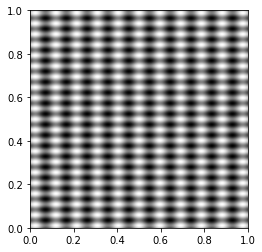

In [ ]:
hFrec = 10.5   # Frecuencia horizontal
vFrec = 20.5   # Frecuencia vertical

A1 = np.sin(hFrec*2*np.pi*X) + np.sin(vFrec*2*np.pi*Y)

plt.figure()
plt.imshow(A1, cmap = 'gray', extent=[0,1,0,1]);

Si cortamos esta superficie por el plano  y=0.5
  tenemos la curva

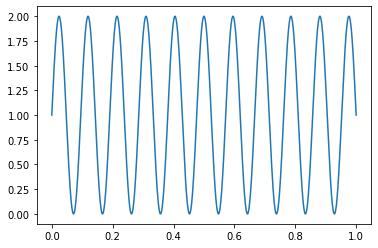

In [ ]:
xx = np.linspace(0,1,1200)
yy = 0.5*np.ones(1200)
plt.plot(xx,np.sin(hFrec*2*np.pi*xx) + np.sin(vFrec*2*np.pi*yy))
plt.show()

y si cortamos por el plano  x=0.5

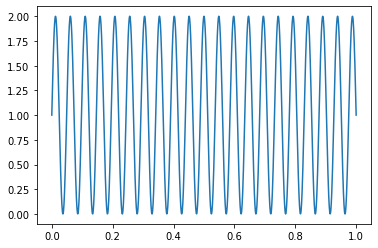

In [ ]:
yy = np.linspace(0,1,1200)
xx = 0.5*np.ones(1200)
plt.plot(yy,np.sin(hFrec*2*np.pi*xx) + np.sin(vFrec*2*np.pi*yy))
plt.show()

Hacemos la TDF

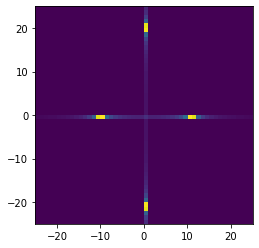

In [ ]:
F1 = fft2(A1)/(W*H)                          
F1 = fftshift(F1) #fftshift reorganiza los elementos de la matriz de forma que las frecuencias que salen de hacer la transformada se organizan de forma más
#intuitiva, con las frecuencias más altas en las esquinas y las más bajas hacia el centro.
P1 = np.abs(F1) #No tengo muy claro porque se hace el valor absoluto

plt.figure()
plt.imshow(P1[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

Si cortamos la superficie con un plano perpendicular al plano  OXY
  que contiene al eje  OX

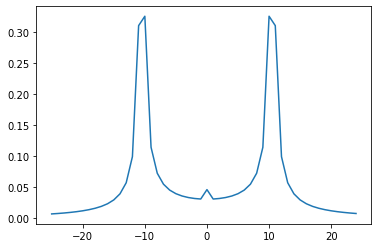

In [ ]:
plt.plot(range(-25,25),P1[hH,hW-25:hW+25])
plt.show()

Y con un plano que contiene a  OY

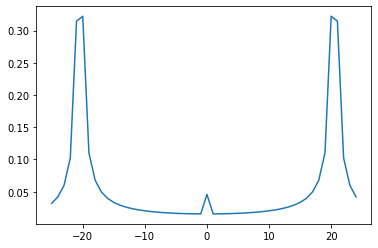

In [ ]:
plt.plot(range(-25,25),P1[hH-25:hH+25,hW])
plt.show()

Otro ejemplo

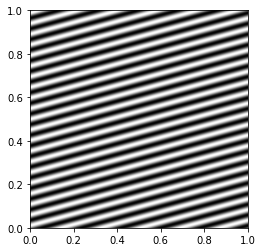

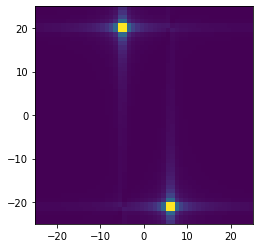

In [ ]:
hFrec = 5.5   # Frecuencia horizontal
vFrec = 20.5   # Frecuencia vertical

A2 = np.sin(hFrec*2*np.pi*X + vFrec*2*np.pi*Y)

plt.figure()
plt.imshow(A2, cmap = 'gray',extent=[0,1,0,1]);

F2 = fft2(A2)/(W*H)                          
F2 = fftshift(F2)
P2 = np.abs(F2)

r = 25
plt.figure()
plt.imshow(P2[hH-r:hH+r,hW-r:hW+r], extent=[-r,r,-r,r]);
#[hH-r:hH+r,hW-r:hW+r]

## Análisis de secciones DICOM ##

Añadimos ahora un acceso a las secciones a analizar, así como añadir el paquete que nos permite acceder a los documento stipo DICOM

In [ ]:
!pip install pydicom
import pydicom
from google.colab import drive
drive.mount('/content/drive')

from __future__ import division             # hace que se utilice la división en punto flotante
import numpy as np                          
import matplotlib.pyplot as plt             
from PIL import Image                      
from numpy.fft import fft2, fftshift, ifft2 
import pydicom
from pydicom.data import get_testdata_files
import os


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.8 MB/s eta 0:00:00
Mounted at /content/drive


Definimos previamente fft2Dfinal (Transformada de fourier rápida en 2D) y su inversa. (tanto como para visualización como para procesamiento). 

In [ ]:
def  fft2Dfinal(a):
 b = fft2(a)
 c = fftshift(b)
 return c
def  fft2Dfinalimag(a):
 b = fft2(a)
 c = fftshift(b)
 d = np.abs(c) # Si calculas el valor absoluto, pierdes la información de la fase y por tanto no puedes
 d = np.log(c).astype(float)
 return d
def  ifft2Dfinal(m):
 b = np.fft.ifft2(m)
 return b

In [ ]:
!pip install -qq dcm2niix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.4/451.4 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/Elementos nifty filtrado clasico' -full nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/Full_dose/'

/bin/bash: dcm2niix: command not found


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/Elementos nifty filtrado clasico' -med nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-20 dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 644 DICOM file(s)
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/Elementos nifty filtrado clasico/1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13a (440x440x644x1)
Conversion required 29.312805 seconds (11.961474 for core code).


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/Elementos nifty filtrado clasico' -low nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-100 dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 644 DICOM file(s)
UINT16->INT16 Future release will change default. github.com/rordenlab/dcm2niix/issues/338
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/Elementos nifty filtrado clasico/1-100_dose_PET_WB_TrueX_TOF_440_G2_Faktor_100_20211201130645_15a (440x440x644x1)
Conversion required 28.093207 seconds (8.255432 for core code).


In [ ]:
!ls '/content/drive/My Drive/TFG ALEJANDRO/PETIma/Elementos nifty filtrado clasico'

1-100_dose_PET_WB_TrueX_TOF_440_G2_Faktor_100_20211201130645_15a.json
1-100_dose_PET_WB_TrueX_TOF_440_G2_Faktor_100_20211201130645_15a.nii.gz
1-100_dose_PET_WB_TrueX_TOF_440_G2_Faktor_100_20211201130645_15.json
1-100_dose_PET_WB_TrueX_TOF_440_G2_Faktor_100_20211201130645_15.nii.gz
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13a.json
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13a.nii.gz
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13.json
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13.nii.gz
niftya.json
niftya.nii.gz
nifty.json
nifty.nii.gz


Una vez definidas las funciones de transformada de fourier, los paquetes y las secciones cargadas, pasamos a analizarlas.

En el código siguiente se definen los filtros a utilizar, o bien gausiano en el que simplemente se crea una malla gausiana que se multiplica por la distribución de intensidades en el dominio de frecuencias. Si es de wiener se toma primero el SNR y luego se pesa cada punto por estr valor

Se analizan en tres pasos:

1. Partimos de la imagen, a tres niveles de ruido, sin filtrar **aplicamos la transformada de fourier**
2. Con la imagen transformada **aplicamos uno de los filtros** seleccionado, wiener o gausiano en este caso.
3. Una vez filtrada, **deshacemos la transformada**.

In [37]:
!pip install pydicom
import pydicom
from google.colab import drive
drive.mount('/content/drive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from __future__ import division             # hace que se utilice la división en punto flotante            
from PIL import Image                      
from numpy.fft import fft2, fftshift, ifft2 
from pydicom.data import get_testdata_files
import os


In [39]:
import nibabel as nib
full = nib.load('/content/drive/My Drive/TFG ALEJANDRO/PETIma/Elementos nifty filtrado clasico/nifty.nii.gz')
med = nib.load('/content/drive/My Drive/TFG ALEJANDRO/PETIma/Elementos nifty filtrado clasico/1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13.nii.gz')
low = nib.load('/content/drive/My Drive/TFG ALEJANDRO/PETIma/Elementos nifty filtrado clasico/1-100_dose_PET_WB_TrueX_TOF_440_G2_Faktor_100_20211201130645_15.nii.gz')


In [40]:
def  fft2Dfinal(a):
 b = fft2(a)
 c = fftshift(b)
 return c
def  fft2Dfinalimag(a):
 b = fft2(a)
 c = fftshift(b)
 d = np.abs(c) # Si calculas el valor absoluto, pierdes la información de la fase y por tanto no puedes
 d = np.log(c).astype(float)
 return d
def  ifft2Dfinal(m):
 b = np.fft.ifft2(m)
 return b

Por favor, escoge qué sección quieres analizar: 350
Por favor, escoge qué tipo de filtrado quieres, g si gausiano o w si wiener: g


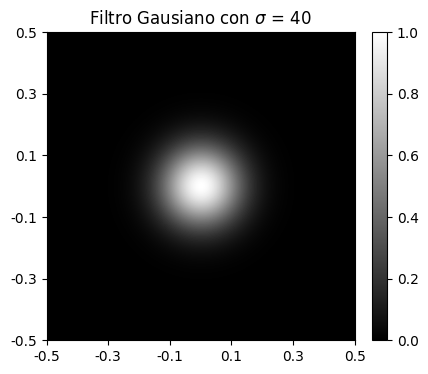

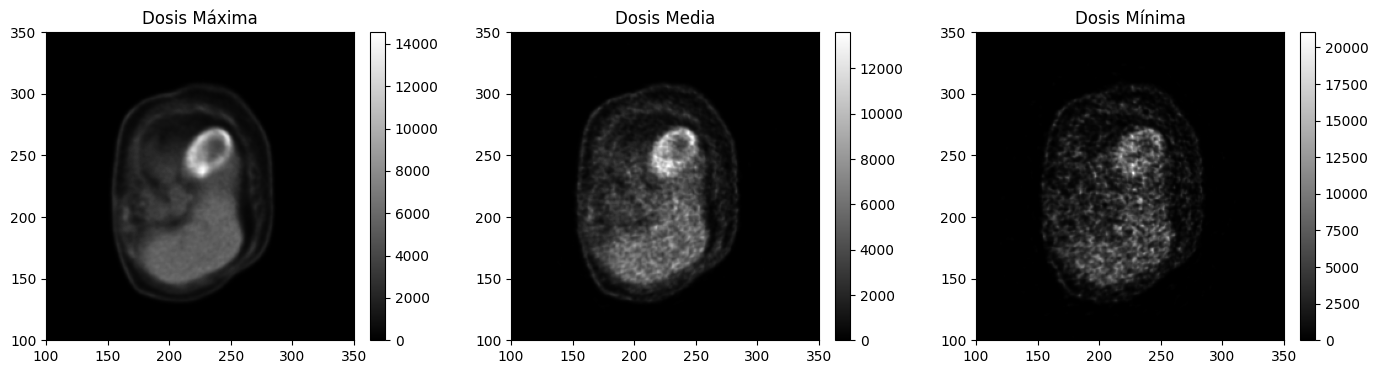

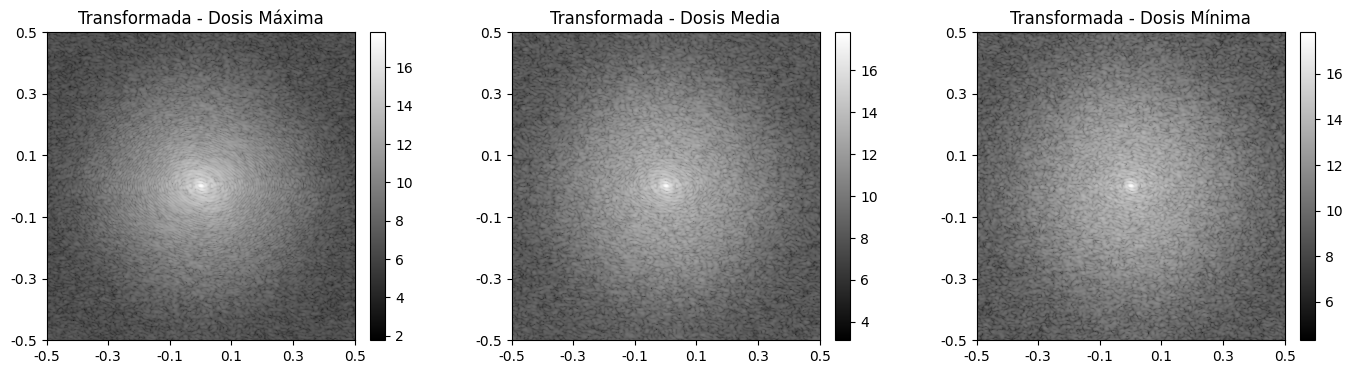

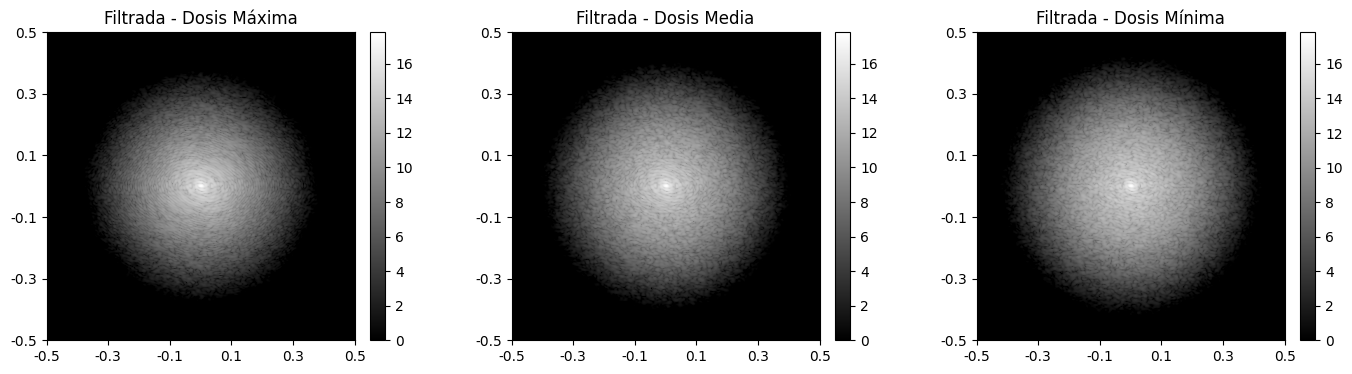

Número de cuentas antes 1: 55039679.67051172
Número de cuentas dspués 1: 55039679.67051171
Número de cuentas antes 1: 55039679.67051172
Número de cuentas dspués 1: 55039679.67051171
Número de cuentas antes 1: 55039679.67051172
Número de cuentas dspués 1: 55039679.67051171


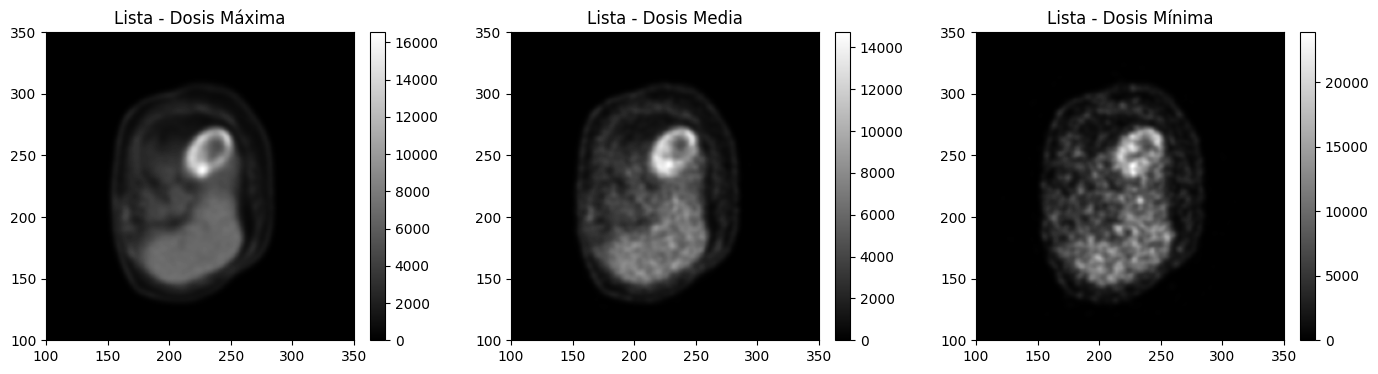

In [62]:

warnings.filterwarnings('ignore')

# Cargar la imagen
#img = nib.load('/content/drive/My Drive/TFG ALEJANDRO/PETIma/nifty.nii.gz')

# Obtener los datos de la imagen como un array NumPy
ful = full.get_fdata()
me = med.get_fdata()
lo = low.get_fdata()

# Seleccionar diferentes componentes en diferentes z
z = input("Por favor, escoge qué sección quieres analizar: ")
z = int(z)  # convierte la cadena introducida por el usuario a un entero
filtro = input("Por favor, escoge qué tipo de filtrado quieres, g si gausiano o w si wiener: ")
# Obtener las secciones correspondientes en cada z
seccion1 = ful[:,:,z]
seccion2 = me[:,:,z]
seccion3 = lo[:,:,z]

#seccion1 = seccion1a/np.sum(seccion1a)
#seccion2 = seccion2b/np.sum(seccion2b)
#seccion3 = seccion3c/np.sum(seccion3c)


# Hacemos la transformada para analizarla
Seccion1transf = fft2Dfinal(seccion1)
Seccion2transf = fft2Dfinal(seccion2)
Seccion3transf = fft2Dfinal(seccion3)                
Seccionestransf = [Seccion1transf, Seccion2transf, Seccion3transf]
H, W = np.shape(Seccion1transf)
mW = int(np.fix(0.5 * W))   # Entero que vale, aproximadamente, la mitad de W
mH = int(np.fix(0.5 * H))   # Entero que vale, aproximadamente, la mitad de H
# Calcular las nuevas etiquetas
new_tick_locations = np.linspace(0, 440, 6)  # ubicaciones originales de los ticks
new_tick_labels = np.linspace(-0.5, 0.5, 6)  # nuevas etiquetas de -0.5 a 0.5
new_tick_labels = ["{:.1f}".format(i) for i in new_tick_labels]  # convertir a cadena para etiquetar

# Definimos la gausiana
nx = np.shape(Seccion1transf)[0]
ny = np.shape(Seccion1transf)[1]
lx = np.arange(nx)
ly = np.arange(ny)
[xx, yy] = np.meshgrid(lx, ly)
sigma = 40
x0 = nx / 2
y0 = ny / 2
gausiana = np.exp(-0.5 * ((xx - x0) ** 2 + (yy - y0) ** 2) / sigma ** 2)
plt.figure(figsize=(17, 4))
gau = plt.imshow(gausiana, cmap='gray')
plt.title(f'Filtro Gausiano con $\sigma$ = {sigma}' )
plt.colorbar(gau, fraction=0.046, pad=0.013)
plt.xlim(0, 440)
plt.ylim(0, 440)
plt.xticks(new_tick_locations, new_tick_labels)
plt.yticks(new_tick_locations, new_tick_labels)

plt.show()

# Definimos la función para aplicar el filtro de Wiener
import scipy.fftpack as fftpack

def wiener_filter_2d(image,spectrum):

    c2 = np.abs(spectrum) ** 2
    n2 = np.mean(np.abs(np.fft.fft2(image[100:200, 250:300])) ** 2)*20
    s2 = c2 - n2
    s2[s2 < 0] = 0
    
    min_threshold = 1e-6
    c2 = np.maximum(c2, min_threshold)
    s2 = np.maximum(s2, min_threshold)
    
    c2_condition = c2 < s2
    c2[c2_condition] = s2[c2_condition]
    
    wiener_filter = s2 / c2
    filtered_image = spectrum * wiener_filter
    wiener_filter = np.maximum(wiener_filter, 0)
    return filtered_image

def comprobante(image,spectrum):
    c2 = np.abs(spectrum) ** 2
    n2 = np.mean(np.abs(np.fft.fft2(image[100:200, 250:300])) ** 2)*20
    s2 = c2 - n2
    s2[s2 < 0] = 0
    
    min_threshold = 1e-6
    c2 = np.maximum(c2, min_threshold)
    s2 = np.maximum(s2, min_threshold)
    
    c2_condition = c2 < s2
    c2[c2_condition] = s2[c2_condition]
    
    wiener_filter = s2 / c2
    filtered_image = spectrum * wiener_filter
    wiener_filter = np.maximum(wiener_filter, 0)
    return s2,c2
def ilustrativowiener_filter_2d(image,spectrum):
    c2 = np.abs(spectrum) ** 2
    n2 = np.mean(np.abs(np.fft.fft2(image[100:200, 250:300])) ** 2)*20
    s2 = c2 - n2
    s2[s2 < 0] = 0
    
    min_threshold = 1e-6
    c2 = np.maximum(c2, min_threshold)
    s2 = np.maximum(s2, min_threshold)
    
    c2_condition = c2 < s2
    c2[c2_condition] = s2[c2_condition]
    
    wiener_filter = s2 / c2
    filtered_image = spectrum * wiener_filter
    wiener_filter = np.maximum(wiener_filter, 0)
    return wiener_filter

def SNR(image,spectrum):
    c2 = np.abs(spectrum) ** 2
    n2 = np.mean(np.abs(np.fft.fft2(image[300:350, 300:350])) ** 2)
    s2 = c2 - n2
    snr = np.mean(np.abs(np.fft.fft2(image[150:300, 150:300])-n2))/n2
    s2[s2 < 0] = 0
    
    min_threshold = 1e-6
    c2 = np.maximum(c2, min_threshold)
    s2 = np.maximum(s2, min_threshold)
    
    c2_condition = c2 < s2
    c2[c2_condition] = s2[c2_condition]
    
    wiener_filter = s2 / c2
    filtered_image = spectrum * wiener_filter
    wiener_filter = np.maximum(wiener_filter, 0)
    snr = np.mean(s2)/n2
    return snr   
# Se puede usar cuando asumimos que no hay correlación entre la señal y el ruido
Seccion1transfim = fft2Dfinalimag(seccion1)
Seccion2transfim = fft2Dfinalimag(seccion2)
Seccion3transfim = fft2Dfinalimag(seccion3)                   
Seccionestransfim = [Seccion1transfim,Seccion2transfim,Seccion3transfim]

# Filtramos el ruido de las imágenes 
while True:
    
    if filtro == "g":
        Seccion1filtr = Seccion1transf * gausiana
        Seccion2filtr = Seccion2transf * gausiana
        Seccion3filtr = Seccion3transf * gausiana


        break
    if filtro == "w":
        
        Seccion1filtr = wiener_filter_2d(seccion1,Seccion1transf)
        Seccion2filtr = wiener_filter_2d(seccion2,Seccion2transf)
        Seccion3filtr = wiener_filter_2d(seccion3,Seccion3transf)
        
        plt.figure(figsize=(12, 4))

        plt.subplot(131)
        im1 = plt.imshow(ilustrativowiener_filter_2d(seccion1,Seccion1transf), cmap='gray')
        plt.colorbar(im1, pad=0.04, shrink=0.75)
        plt.title('Filtro de Wiener - Dosis Máxima')
        plt.xlim(0, 440)
        plt.ylim(0, 440)
        plt.xticks(new_tick_locations, new_tick_labels)
        plt.yticks(new_tick_locations, new_tick_labels)


        plt.subplot(132)
        im2 = plt.imshow(ilustrativowiener_filter_2d(seccion2,Seccion2transf), cmap='gray')
        plt.colorbar(im2, pad=0.04, shrink=0.75)
        plt.title('Filtro de Wiener - Dosis Media')
        plt.xlim(0, 440)
        plt.ylim(0, 440)
        plt.xticks(new_tick_locations, new_tick_labels)
        plt.yticks(new_tick_locations, new_tick_labels)

        plt.subplot(133)
        im3 = plt.imshow(ilustrativowiener_filter_2d(seccion3,Seccion3transf), cmap='gray')
        plt.colorbar(im3, pad=0.04, shrink=0.75)
        plt.title('Filtro de Wiener - Dosis Mínima')
        plt.xlim(0, 440)
        plt.ylim(0, 440)
        plt.xticks(new_tick_locations, new_tick_labels)
        plt.yticks(new_tick_locations, new_tick_labels)

        plt.tight_layout()
        plt.show()
        break

    else:
        print("Entrada no válida, por favor introduce 'g' o 'w'.")
        continue



# Y las preparamos para ser visualizadas
Seccion1filtrim = np.log(Seccion1filtr).astype(float)
Seccion2filtrim = np.log(Seccion2filtr).astype(float)
Seccion3filtrim = np.log(Seccion3filtr).astype(float)
Seccionfiltr = [Seccion1filtr, Seccion2filtr, Seccion3filtr]
Seccionfiltrim = [Seccion1filtrim, Seccion2filtrim, Seccion3filtrim]

# Deshacemos la transformada
Seccionlista1 = ifft2Dfinal(Seccion1filtr)
Seccionlista2 = ifft2Dfinal(Seccion2filtr)
Seccionlista3 = ifft2Dfinal(Seccion3filtr)
Seccionlista = [Seccionlista1, Seccionlista2, Seccionlista3]
a1 = np.mean(np.abs(seccion1))
b1 = np.mean(np.abs(seccion2))
c1 = np.mean(np.abs(seccion3))
a2 = np.mean(np.abs(Seccionlista1))
b2 = np.mean(np.abs(Seccionlista2))
c2 = np.mean(np.abs(Seccionlista3))
Seccionlista1 = Seccionlista1*(a1/a2)
Seccionlista2 = Seccionlista2*(b1/b2)
Seccionlista3 = Seccionlista3*(c1/c2)
# Mostrar las secciones
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 4))
im0 = axs[0].imshow(seccion1, cmap='gray')
axs[0].set_title("Dosis Máxima")
axs[0].set_xlim(100, 350)
axs[0].set_ylim(100, 350)
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)
im1 = axs[1].imshow(seccion2, cmap='gray')
axs[1].set_title("Dosis Media")
axs[1].set_xlim(100, 350)
axs[1].set_ylim(100, 350)
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)
im2 = axs[2].imshow(seccion3, cmap='gray')
axs[2].set_title("Dosis Mínima")
axs[2].set_xlim(100, 350)
axs[2].set_ylim(100, 350)
fig.colorbar(im2, ax=axs[2], fraction=0.046, pad=0.04)
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 4))
im3 = axs[0].imshow(Seccion1transfim, cmap='gray')
axs[0].set_title("Transformada - Dosis Máxima")
axs[0].set_xlim(0, 440)
axs[0].set_ylim(0, 440)
axs[0].set_xticks(new_tick_locations)
axs[0].set_yticks(new_tick_locations)
axs[0].set_xticklabels(new_tick_labels)
axs[0].set_yticklabels(new_tick_labels)

fig.colorbar(im3, ax=axs[0], fraction=0.046, pad=0.04)
im4 = axs[1].imshow(Seccion2transfim, cmap='gray')
axs[1].set_title("Transformada - Dosis Media")
axs[1].set_xlim(0, 440)
axs[1].set_ylim(0, 440)
axs[1].set_xticks(new_tick_locations)
axs[1].set_yticks(new_tick_locations)
axs[1].set_xticklabels(new_tick_labels)
axs[1].set_yticklabels(new_tick_labels)

fig.colorbar(im4, ax=axs[1], fraction=0.046, pad=0.04)
im5 = axs[2].imshow(Seccion3transfim, cmap='gray')
axs[2].set_title("Transformada - Dosis Mínima")
axs[2].set_xlim(0, 440)
axs[2].set_ylim(0, 440)
axs[2].set_xticks(new_tick_locations)
axs[2].set_yticks(new_tick_locations)
axs[2].set_xticklabels(new_tick_labels)
axs[2].set_yticklabels(new_tick_labels)

fig.colorbar(im5, ax=axs[2], fraction=0.046, pad=0.04)
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 4))
im6 = axs[0].imshow(Seccion1filtrim, cmap='gray', vmin=0)
axs[0].set_title("Filtrada - Dosis Máxima")
axs[0].set_xlim(0, 440)
axs[0].set_ylim(0, 440)
axs[0].set_xticks(new_tick_locations)
axs[0].set_yticks(new_tick_locations)
axs[0].set_xticklabels(new_tick_labels)
axs[0].set_yticklabels(new_tick_labels)

fig.colorbar(im6, ax=axs[0], fraction=0.046, pad=0.04)

im7 = axs[1].imshow(Seccion2filtrim, cmap='gray', vmin=0)
axs[1].set_title("Filtrada - Dosis Media")
axs[1].set_xlim(0, 440)
axs[1].set_ylim(0, 440)
axs[1].set_xticks(new_tick_locations)
axs[1].set_yticks(new_tick_locations)
axs[1].set_xticklabels(new_tick_labels)
axs[1].set_yticklabels(new_tick_labels)

fig.colorbar(im7, ax=axs[1], fraction=0.046, pad=0.04)

im8 = axs[2].imshow(Seccion3filtrim, cmap='gray', vmin=0)
axs[2].set_title("Filtrada - Dosis Mínima")
axs[2].set_xlim(0, 440)
axs[2].set_ylim(0, 440)
axs[2].set_xticks(new_tick_locations)
axs[2].set_yticks(new_tick_locations)
axs[2].set_xticklabels(new_tick_labels)
axs[2].set_yticklabels(new_tick_labels)

fig.colorbar(im8, ax=axs[2], fraction=0.046, pad=0.04)

plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 4))
im9 = axs[0].imshow(np.abs(Seccionlista1*1.25), cmap='gray') #*1.04
axs[0].set_title("Lista - Dosis Máxima")
axs[0].set_xlim(100, 350)
axs[0].set_ylim(100, 350)
fig.colorbar(im9, ax=axs[0], fraction=0.046, pad=0.04)
im10 = axs[1].imshow(np.abs(Seccionlista2*1.25), cmap='gray')
axs[1].set_title("Lista - Dosis Media")
axs[1].set_xlim(100, 350)
axs[1].set_ylim(100, 350)
fig.colorbar(im10, ax=axs[1], fraction=0.046, pad=0.04)
im11 = axs[2].imshow(np.abs(Seccionlista3*1.91), cmap='gray') #*1.6
axs[2].set_title("Lista - Dosis Mínima")
axs[2].set_xlim(100, 350)
axs[2].set_ylim(100, 350)
fig.colorbar(im11, ax=axs[2], fraction=0.046, pad=0.04)
num_cuentasantes1 = np.sum(seccion1)
num_cuentasdespues1 = np.sum(np.abs(Seccionlista1))
print("Número de cuentas antes 1:", num_cuentasantes1)
print("Número de cuentas dspués 1:", num_cuentasdespues1)
num_cuentasantes2 = np.sum(seccion1)
num_cuentasdespues2 = np.sum(np.abs(Seccionlista1))
print("Número de cuentas antes 1:", num_cuentasantes2)
print("Número de cuentas dspués 1:", num_cuentasdespues2)
num_cuentasantes3 = np.sum(seccion1)
num_cuentasdespues3 = np.sum(np.abs(Seccionlista1))
print("Número de cuentas antes 1:", num_cuentasantes3)
print("Número de cuentas dspués 1:", num_cuentasdespues3)
plt.show()



**Calculamos el MAE y el MSE**

In [ ]:
import numpy as np

def calculate_mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def calculate_mae(imageA, imageB):
    err = np.sum(np.abs(imageA.astype("float") - imageB.astype("float")))
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


In [52]:
from PIL import Image
import numpy as np

def calculate_mae(image1, image2):
    # Calcula el MAE
    image2 = np.abs(image2)
    mae = np.mean(np.abs(image1 - image2))
    
    return mae

def calculate_mse(image1, image2):
    image2 = np.abs(image2)
    # Calcula el MSE
    mse = np.mean((image1 - image2) ** 2)
    
    return mse


In [80]:
seccion1 = seccion1*1.43

In [81]:
print("MAE sin filtrar 1vs2:",calculate_mae(seccion1, seccion2*1.4))
print("MAE sin filtrar 1vs3:",calculate_mae(seccion1, seccion3))

print("MSE sin filtrar 1vs2:",calculate_mse(seccion1, seccion2*1.4))
print("MSE sin filtrar 1vs3:",calculate_mse(seccion1, seccion3))


MAE sin filtrar 1vs2: 792.5424917180258
MAE sin filtrar 1vs3: 904.7029070650832
MSE sin filtrar 1vs2: 9926179.98010915
MSE sin filtrar 1vs3: 13075581.517134884


In [82]:
print("MAE sin filtrar 1vs1:",calculate_mae(seccion1, seccion1))
print("MSE sin filtrar 1vs1:",calculate_mse(seccion1, seccion1))

MAE sin filtrar 1vs1: 0.0
MSE sin filtrar 1vs1: 0.0


In [83]:
print("MAE1gaus:",calculate_mae(seccion1, Seccionlista1*1.1))
print("MAE2gaus:",calculate_mae(seccion1, Seccionlista2*1.187*1.4))
print("MAE3gaus:",calculate_mae(seccion1, Seccionlista3*1.67))

print("MSE1gaus:",calculate_mse(seccion1, Seccionlista1*1.1))
print("MSE2gaus:",calculate_mse(seccion1, Seccionlista2*1.187*1.4))
print("MSE3gaus:",calculate_mse(seccion1, Seccionlista3*1.67))


MAE1gaus: 876.1945528918587
MAE2gaus: 719.1148989838922
MAE3gaus: 715.4058577508121
MSE1gaus: 12124244.453131361
MSE2gaus: 8335254.62006193
MSE3gaus: 8451610.898229087


Subimos la imagen generada por la IA del otro código

In [76]:
seccionIA = np.loadtxt('filtradaIAcomparar.txt')



In [77]:
print("MAEIA:",calculate_mae(seccion1, seccionIA))
print("MSEIA:",calculate_mse(seccion1, seccionIA))


MAEIA: 395.12550449134903
MSEIA: 2942407.0341492975


In [ ]:
MAE1gaus: 408.0576316144874
MAE2gaus: 477.38414248253247
MAE3gaus: 493.4932223904772
MSE1gaus: 4054355.942104272

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Esto se ha tenido que hacer porque simultáneamente no podemos tener las imagenes filtradas por gausiana y por wiener al ejecutar
secwiener1 = Seccionlista1
secwiener2 = Seccionlista2
secwiener3 = Seccionlista3 


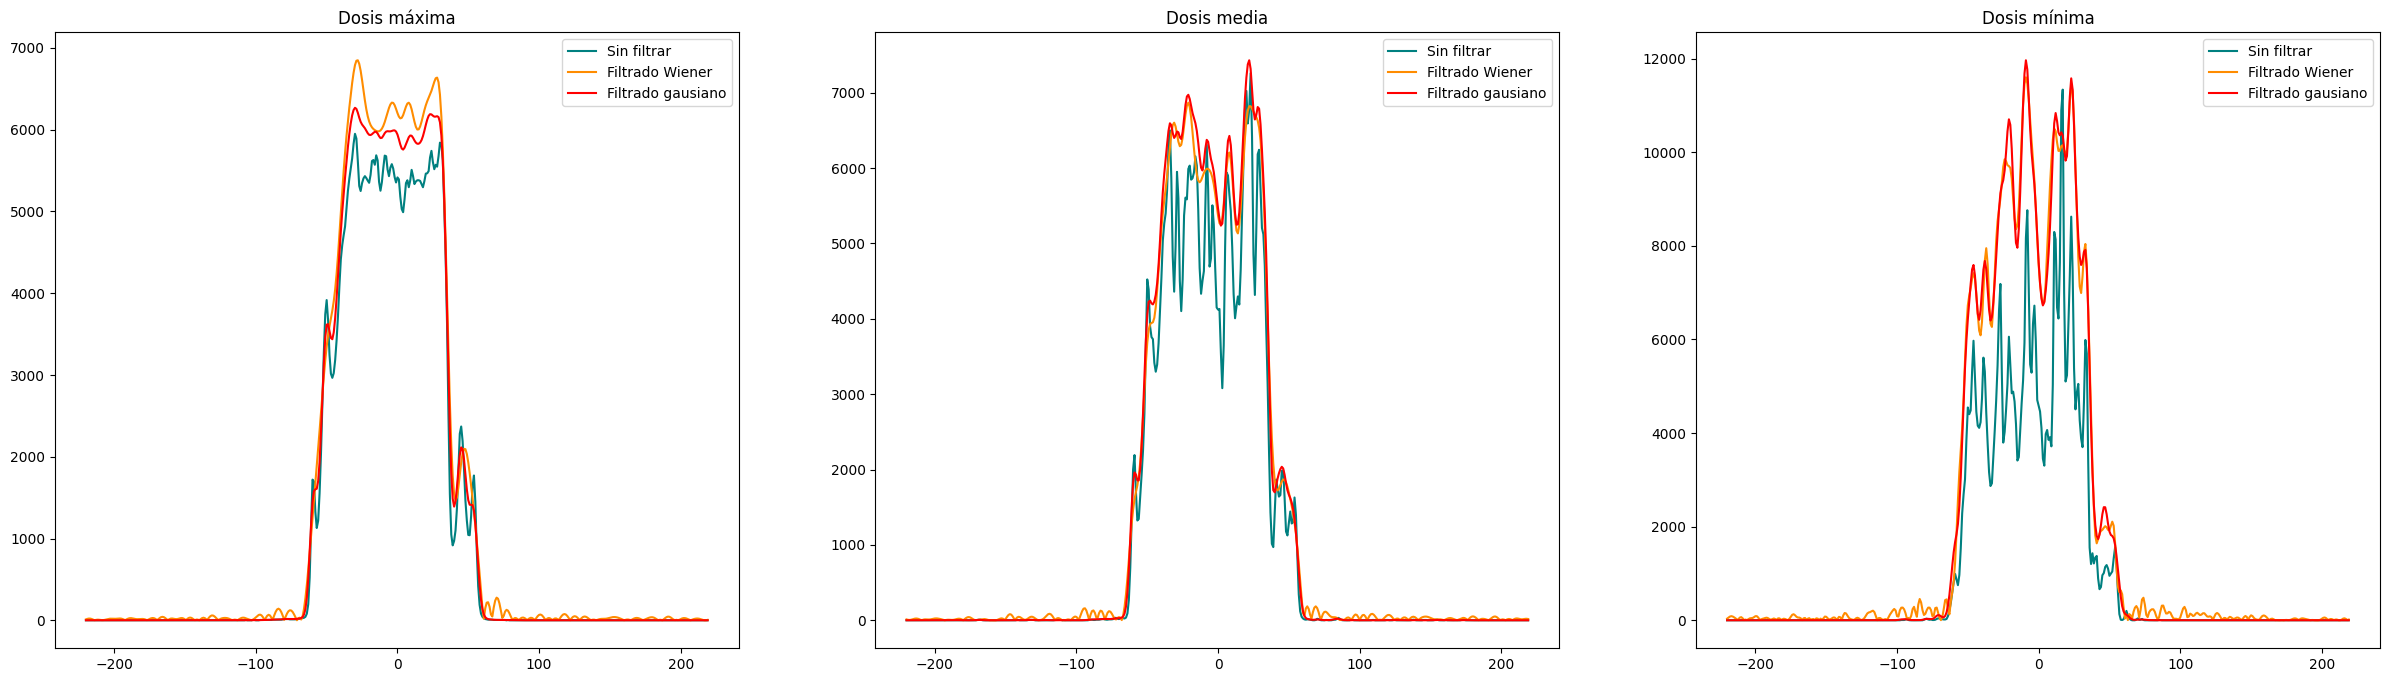

In [ ]:
mW = 220  # Mitad de anchura

plt.figure(figsize=(30, 8))

# Plot 1
plt.subplot(1, 3, 1)
plt.plot(range(-220, 220), np.abs(seccion1)[170, mW-220:mW+220+1], color='teal', label='Sin filtrar')
plt.plot(range(-220, 220), np.abs(secwiener1*1.25)[170, mW-220:mW+220+1], color='darkorange', label='Filtrado Wiener')
plt.plot(range(-220, 220), np.abs(Seccionlista1*1.1)[170, mW-220:mW+220+1], color='r', label='Filtrado gausiano')
plt.title("Dosis máxima")
plt.legend(loc='upper right')

# Plot 2
plt.subplot(1, 3, 2)
plt.plot(range(-220, 220), np.abs(seccion2)[170, mW-220:mW+220+1], color='teal', label='Sin filtrar')
plt.plot(range(-220, 220), np.abs(secwiener2*1.25)[170, mW-220:mW+220+1], color='darkorange', label='Filtrado Wiener')
plt.plot(range(-220, 220), np.abs(Seccionlista2*1.187)[170, mW-220:mW+220+1], color='r', label='Filtrado gausiano')
plt.title("Dosis media")
plt.legend(loc='upper right')

# Plot 3
plt.subplot(1, 3, 3)
plt.plot(range(-220, 220), np.abs(seccion3)[170, mW-220:mW+220+1], color='teal', label='Sin filtrar')
plt.plot(range(-220, 220), np.abs(secwiener3*1.91)[170, mW-220:mW+220+1], color='darkorange', label='Filtrado Wiener' )
plt.plot(range(-220, 220), np.abs(Seccionlista3*1.67)[170, mW-220:mW+220+1], color='r', label='Filtrado gausiano')
plt.title("Dosis mínima")
plt.legend(loc='upper right')


plt.show()

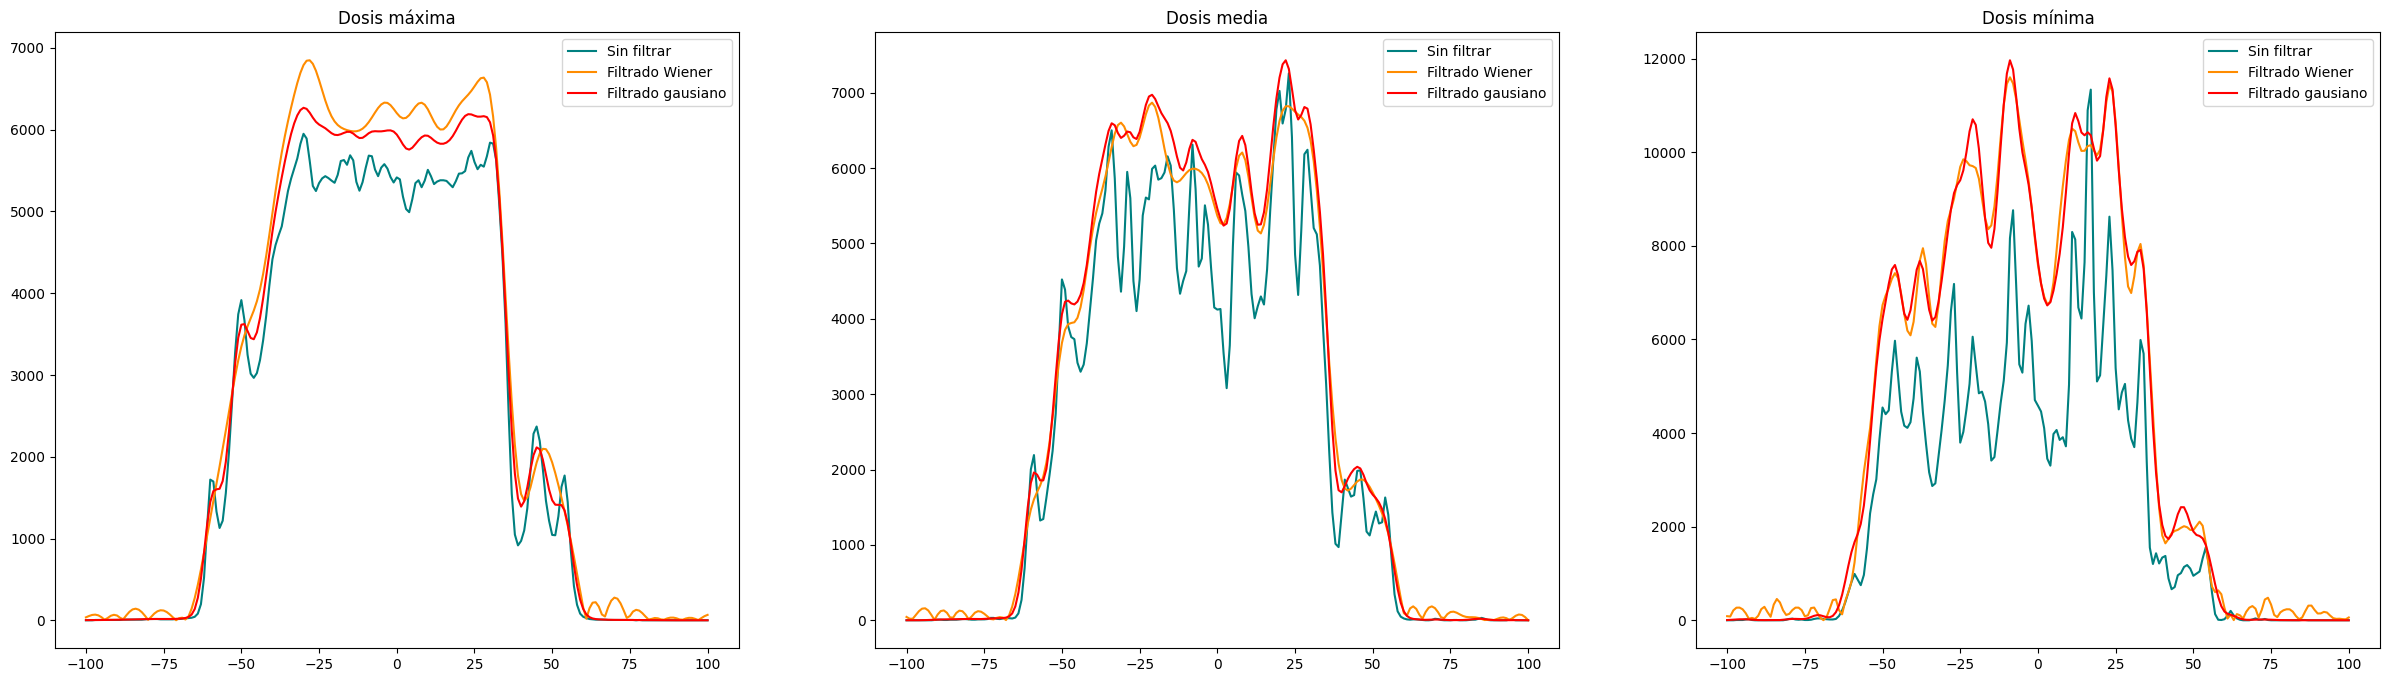

In [ ]:
plt.figure(figsize=(30, 8))

# Plot 1
plt.subplot(1, 3, 1)
plt.plot(range(-100, 101), np.abs(seccion1)[170, mW-100:mW+101], color='teal', label='Sin filtrar')
plt.plot(range(-100, 101), np.abs(secwiener1*1.25)[170, mW-100:mW+101], color='darkorange', label='Filtrado Wiener')
plt.plot(range(-100, 101), np.abs(Seccionlista1*1.1)[170, mW-100:mW+101], color='r', label='Filtrado gausiano')
plt.title("Dosis máxima")
plt.legend(loc='upper right')

# Plot 2
plt.subplot(1, 3, 2)
plt.plot(range(-100, 101), np.abs(seccion2)[170, mW-100:mW+101], color='teal', label='Sin filtrar')
plt.plot(range(-100, 101), np.abs(secwiener2*1.25)[170, mW-100:mW+101], color='darkorange', label='Filtrado Wiener')
plt.plot(range(-100, 101), np.abs(Seccionlista2*1.187)[170, mW-100:mW+101], color='r', label='Filtrado gausiano')
plt.title("Dosis media")
plt.legend(loc='upper right')

# Plot 3
plt.subplot(1, 3, 3)
plt.plot(range(-100, 101), np.abs(seccion3)[170, mW-100:mW+101], color='teal', label='Sin filtrar')
plt.plot(range(-100, 101), np.abs(secwiener3*1.91)[170, mW-100:mW+101], color='darkorange', label='Filtrado Wiener' )
plt.plot(range(-100, 101), np.abs(Seccionlista3*1.67)[170, mW-100:mW+101], color='r', label='Filtrado gausiano')
plt.title("Dosis mínima")
plt.legend(loc='upper right')

plt.show()


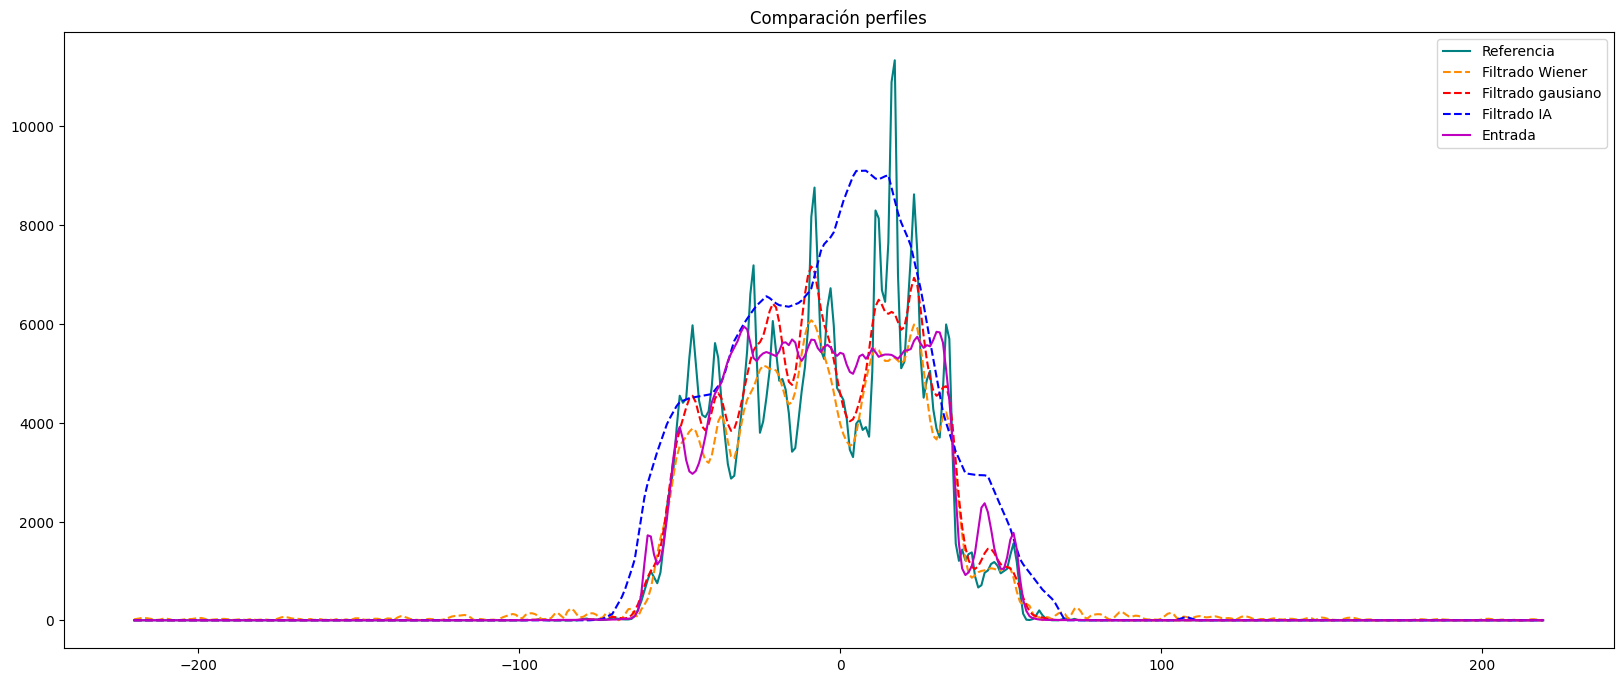

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(range(-220, 220), np.abs(seccion3)[170, mW-220:mW+220+1], color='teal', label='Referencia') 
plt.plot(range(-220, 220), np.abs(secwiener3)[170, mW-220:mW+220+1], color='darkorange', label='Filtrado Wiener',linestyle='--')
plt.plot(range(-220, 220), np.abs(Seccionlista3)[170, mW-220:mW+220+1], color='r', label='Filtrado gausiano',linestyle='--') 
plt.plot(range(-220, 220), np.abs(seccionIA)[170, mW-220:mW+220+1], color='b', label='Filtrado IA',linestyle='--')
plt.plot(range(-220, 220), np.abs(seccion1)[170, mW-220:mW+220+1], color='m', label='Entrada')
plt.title("Comparación perfiles")
plt.legend(loc = 'upper right')

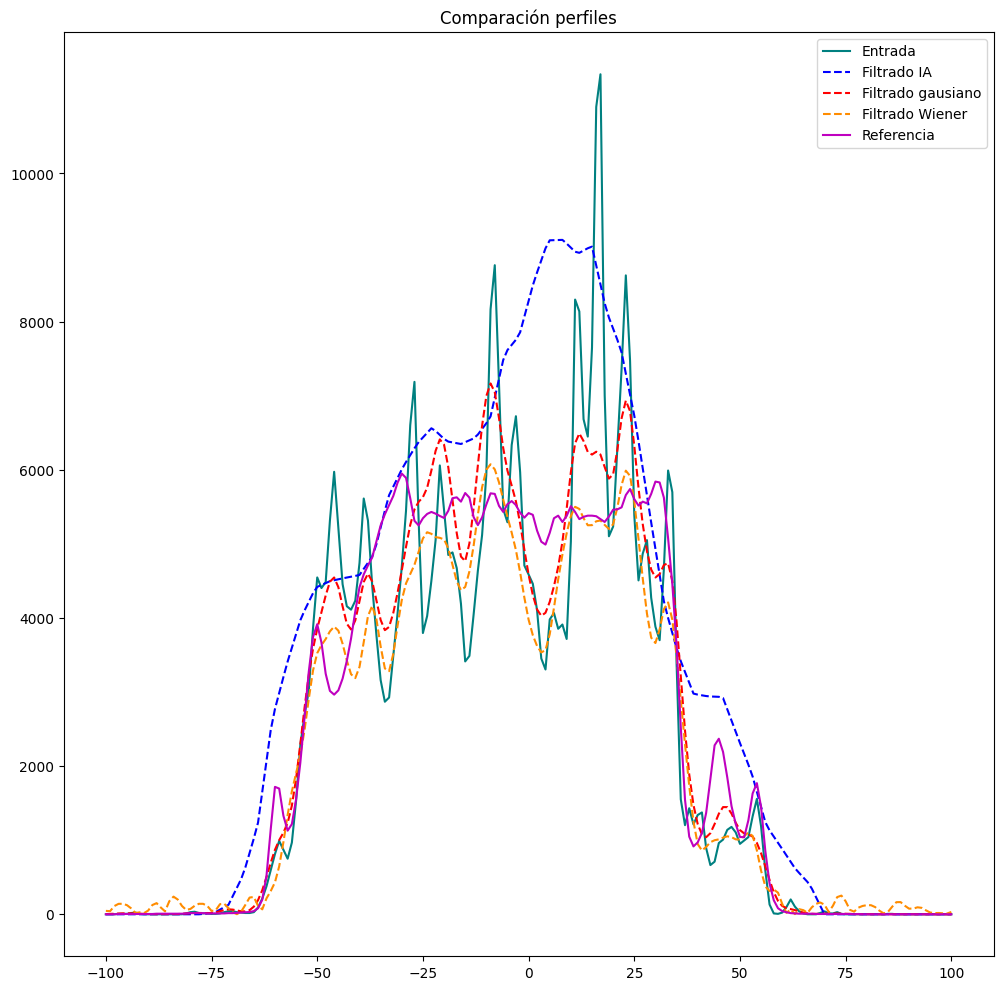

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(range(-100, 101), np.abs(seccion3)[170, mW-100:mW+101], color='teal', label='Entrada') 
plt.plot(range(-100, 101), np.abs(seccionIA)[170, mW-100:mW+101], color='b', label='Filtrado IA', linestyle='--')
plt.plot(range(-100, 101), np.abs(Seccionlista3)[170, mW-100:mW+101], color='r', label='Filtrado gausiano', linestyle='--') 
plt.plot(range(-100, 101), np.abs(secwiener3)[170, mW-100:mW+101], color='darkorange', label='Filtrado Wiener', linestyle='--')
plt.plot(range(-100, 101), np.abs(seccion1)[170, mW-100:mW+101], color='m', label='Referencia')
plt.title("Comparación perfiles")
plt.legend(loc='upper right')


In [ ]:
        signal_power1 = np.mean(np.abs(secwiener1[mH,mW-100:mW+100]) ** 2)
        noise_power1 = np.mean(np.abs(secwiener1[0:1,:]) ** 2)
        snr1 = signal_power1 / noise_power1
        print("SNR1 =", snr1)
        signal_power1 = np.mean(np.abs(secwiener2[mH,mW-100:mW+100]) ** 2)
        noise_power1 = np.mean(np.abs(secwiener2[0:1,:]) ** 2)
        snr1 = signal_power1 / noise_power1
        print("SNR2 =", snr1)
        signal_power1 = np.mean(np.abs(secwiener3[mH,mW-100:mW+100]) ** 2)
        noise_power1 = np.mean(np.abs(secwiener3[0:1,:]) ** 2)
        snr1 = signal_power1 / noise_power1
        print("SNR3 =", snr1)

SNR1 = 8786952167.167017
SNR2 = 3000312.2099090214
SNR3 = 303161.3686487497


In [ ]:
        signal_power1 = np.mean(np.abs(Seccion1filtr[mH,mW-100:mW+100]) ** 2)
        noise_power1 = np.mean(np.abs(Seccion1filtr[0:1,:]) ** 2)
        snr1 = signal_power1 / noise_power1
        print("SNR1 =", snr1)
        signal_power1 = np.mean(np.abs(Seccion2filtr[mH,mW-100:mW+100]) ** 2)
        noise_power1 = np.mean(np.abs(Seccion2filtr[0:1,:]) ** 2)
        snr1 = signal_power1 / noise_power1
        print("SNR2 =", snr1)
        signal_power1 = np.mean(np.abs(Seccion3filtr[mH,mW-100:mW+100]) ** 2)
        noise_power1 = np.mean(np.abs(Seccion3filtr[0:1,:]) ** 2)
        snr1 = signal_power1 / noise_power1
        print("SNR3 =", snr1)

SNR1 = 75343213833935.33
SNR2 = 4185085776239.2495
SNR3 = 387784141112.84515


## Red de regresión, estimación de nivel de ruido ##

Introducción de paquetes necesarios, conexión con google colab ...


In [ ]:
!pip install pydicom
import nibabel as nib
import numpy as np    
import pydicom
from google.colab import drive
drive.mount('/content/drive')

from __future__ import division             # hace que se utilice la división en punto flotante
                      
import matplotlib.pyplot as plt             
from PIL import Image                      
from numpy.fft import fft2, fftshift, ifft2 
import pydicom
from pydicom.data import get_testdata_files
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import nibabel as nib
import numpy as np
import os
import nibabel as nib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
!pip install opencv-python

import cv2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/' -a nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/Full_dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 644 DICOM file(s)
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/Full_dose_PET_WB_TrueX_TOF_440_G2_10Min_20211201130645_7 (440x440x644x1)
Conversion required 20.578292 seconds (9.142942 for core code).


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/' -g nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-100 dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 644 DICOM file(s)
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/1-100_dose_PET_WB_TrueX_TOF_440_G2_Faktor_100_20211201130645_15 (440x440x644x1)
Conversion required 18.545573 seconds (7.488123 for core code).


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/' -f nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-50 dose/'

/bin/bash: dcm2niix: command not found


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/' -e nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-20 dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 644 DICOM file(s)
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13 (440x440x644x1)
Conversion required 23.553091 seconds (12.991359 for core code).


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/' -d nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-10 dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 644 DICOM file(s)
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/1-10_dose_PET_WB_TrueX_TOF_440_G2_Faktor_10_20211201130645_12 (440x440x644x1)
Conversion required 24.096386 seconds (12.325643 for core code).


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/' -c nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-4 dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 644 DICOM file(s)
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/1-4_dose_PET_WB_TrueX_TOF_440_G2_Faktor_4_20211201130645_11 (440x440x644x1)
Conversion required 21.607381 seconds (9.980320 for core code).


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/' -b nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-2 dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 645 DICOM file(s)
1 images have identical time, series, acquisition and instance values. DUPLICATES REMOVED.
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/1-2_dose_PET_WB_TrueX_TOF_440_G2_Faktor_2_20211201130645_10 (440x440x644x1)
Conversion required 22.432746 seconds (9.681417 for core code).


In [ ]:
!ls '/content/drive/My Drive/TFG ALEJANDRO/PETIma/VolumenIA'

1-100_dose_PET_WB_TrueX_TOF_440_G2_Faktor_100_20211201130645_15.json
1-100_dose_PET_WB_TrueX_TOF_440_G2_Faktor_100_20211201130645_15.nii.gz
1-10_dose_PET_WB_TrueX_TOF_440_G2_Faktor_10_20211201130645_12.json
1-10_dose_PET_WB_TrueX_TOF_440_G2_Faktor_10_20211201130645_12.nii.gz
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13.json
1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13.nii.gz
1-2_dose_PET_WB_TrueX_TOF_440_G2_Faktor_2_20211201130645_10.nii.gz
1-4_dose_PET_WB_TrueX_TOF_440_G2_Faktor_4_20211201130645_11.json
1-4_dose_PET_WB_TrueX_TOF_440_G2_Faktor_4_20211201130645_11.nii.gz
Full_dose_PET_WB_TrueX_TOF_440_G2_10Min_20211201130645_7.json
Full_dose_PET_WB_TrueX_TOF_440_G2_10Min_20211201130645_7.nii.gz
nifty.json
nifty.nii.gz


In [ ]:
!pip install pydicom
!pip install opencv-python
!pip install -qq dcm2niix

from google.colab import drive
drive.mount('/content/drive')

import nibabel as nib
import numpy as np
import pydicom
import os
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.callbacks import TensorBoard
from __future__ import division
import matplotlib.pyplot as plt
from PIL import Image
from numpy.fft import fft2, fftshift, ifft2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -qq dcm2niix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.4/451.4 kB 18.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!ls

drive  sample_data  señal_con_ruido.png


In [ ]:
!dcm2niix -z y -o '/content/drive/My Drive/TFG ALEJANDRO/PETIma/VolumenIA' -f nifty '/content/drive/My Drive/TFG ALEJANDRO/PETIma/01122021_1_20211201_164050/1-50 dose/'

Chris Rorden's dcm2niiX version v1.0.20220505  GCC9.4.0 x86-64 (64-bit Linux)
Found 644 DICOM file(s)
Convert 644 DICOM as /content/drive/My Drive/TFG ALEJANDRO/PETIma/VolumenIA/niftya (440x440x644x1)
Conversion required 26.303423 seconds (7.181147 for core code).


In [ ]:
num_sections = 100
# Carga todas las imágenes NIfTI y extrae secciones de cada una
data = []
labels = []
for nifti_file in os.listdir('/content/drive/My Drive/TFG ALEJANDRO/PETIma/VolumenIA'):

    # Saltar archivos que no sean imágenes NIfTI
    if not nifti_file.endswith('.nii.gz'):
        continue

    # Carga la imagen NIfTI
    img = nib.load(os.path.join('/content/drive/My Drive/TFG ALEJANDRO/PETIma/VolumenIA', nifti_file))
    img_data = img.get_fdata()
    if   '1-100_dose' in nifti_file:
            noiselevel = 100.0            
    elif '1-50_dose' in nifti_file:
            noiselevel = 50.0            
    elif '1-20_dose' in nifti_file:            
            noiselevel = 20.0
    elif '1-10_dose' in nifti_file:            
            noiselevel = 10.0
    elif '1-4_dose' in nifti_file:
            noiselevel = 4.0
    elif '1-2_dose' in nifti_file:
            noiselevel = 2.0
    elif 'Full_dose' in nifti_file:
            noiselevel = 1.0            
        
    for i in range(num_sections):
        # Elije una ubicación aleatoria para extraer la sección
        iz = np.random.randint(0, img_data.shape[2] - 1)      
        # Extrae la sección de la imagen
        section = img_data[100:340,100:340,iz]
        section = section / np.mean(section) #dividir entre la media no entre el valor máximo
        data.append(section)
        labels.append(noiselevel)
        # Agrega la sección y su etiqueta a los datos de entrenamiento o prueba
        
# Convertir los datos y etiquetas en matrices numpy
data = np.array(data)
labels = np.array(labels)

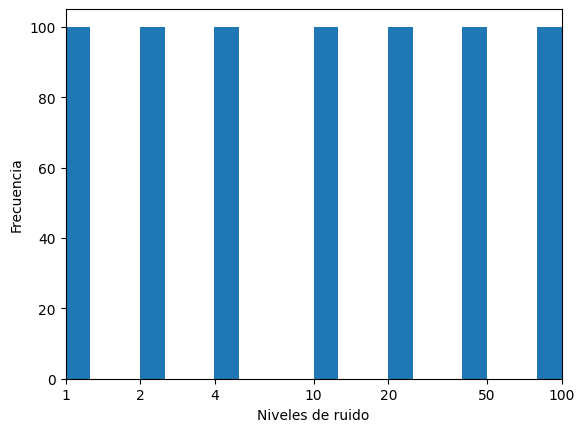

In [ ]:

log_labels = np.log(labels)

plt.hist(log_labels, bins=20)

plt.xlim(min(log_labels), max(log_labels))

x_ticks = np.log([1, 2, 4, 10, 20, 50, 100])
x_labels = [1, 2, 4, 10, 20, 50, 100]

plt.xticks(x_ticks, x_labels)

plt.xlabel('Niveles de ruido')
plt.ylabel('Frecuencia')
# Muestra el gráfico
plt.show()

In [ ]:
if (data.ndim == 3):
  data = np.expand_dims(data,-1)

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba, estratificando según las etiquetas
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
NN = np.shape(X_train[0])

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape= NN))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
#model.add(Dense(250, activation='relu'))
#model.add(Dropout(0.3))
# output layer
model.add(Dense(1, activation='relu'))

In [ ]:
# compiling the sequential model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, batch_size=16, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
35/35 [==============================] - 22s 210ms/step - loss: 1752.9874 - mae: 26.6652 - val_loss: 1786.4023 - val_mae: 26.0360
Epoch 2/10
35/35 [==============================] - 6s 161ms/step - loss: 1091.2437 - mae: 23.6824 - val_loss: 881.1768 - val_mae: 18.2797
Epoch 3/10
35/35 [==============================] - 6s 160ms/step - loss: 799.7269 - mae: 17.2074 - val_loss: 510.5348 - val_mae: 15.5172
Epoch 4/10
35/35 [==============================] - 6s 159ms/step - loss: 256.0398 - mae: 11.1212 - val_loss: 316.9176 - val_mae: 11.9251
Epoch 5/10
35/35 [==============================] - 6s 161ms/step - loss: 156.7011 - mae: 8.3028 - val_loss: 299.7858 - val_mae: 9.1088
Epoch 6/10
35/35 [==============================] - 5s 152ms/step - loss: 134.0245 - mae: 7.0567 - val_loss: 201.9649 - val_mae: 7.8835
Epoch 7/10
35/35 [==============================] - 6s 158ms/step - loss: 96.2144 - mae: 6.0274 - val_loss: 181.6613 - val_mae: 7.5536
Epoch 8/10
35/35 [===================

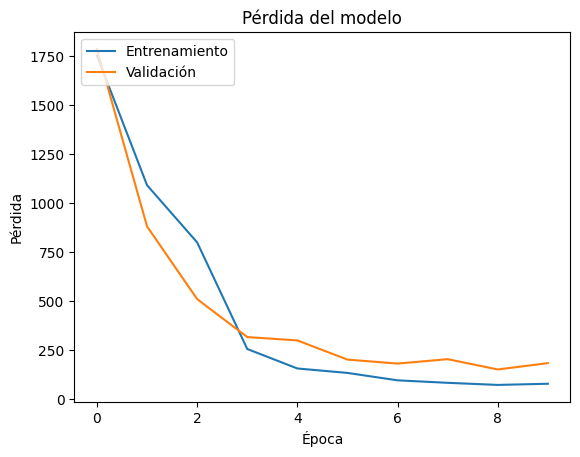

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

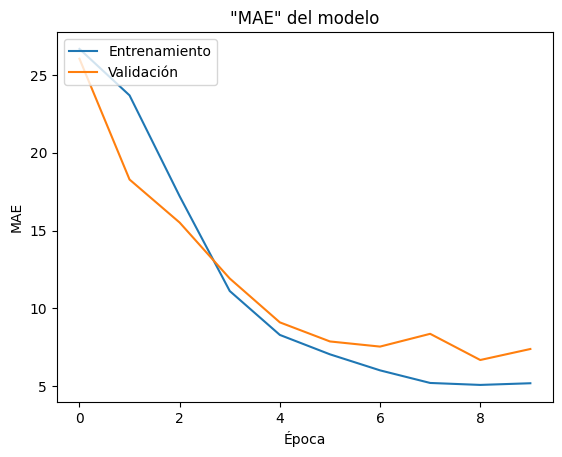

In [ ]:

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('"MAE" del modelo')
plt.ylabel('MAE')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
# Obtener las predicciones de la red de regresión para los datos de entrenamiento y prueba
test_predictions = model.predict(X_test)
# Evaluacion
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Precisión en los datos de prueba:', test_acc)

5/5 [==============================] - 0s 41ms/step - loss: 183.8494 - mae: 7.3992
Precisión en los datos de prueba: 7.39917516708374


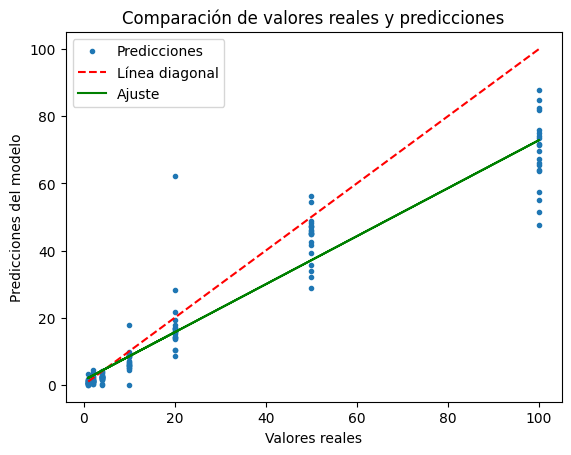

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajuste de los datos
coefficients = np.polyfit(Y_test, test_predictions, 1)
line_fit = np.polyval(coefficients, Y_test)

# Gráfica de los puntos y el ajuste
plt.plot(Y_test, test_predictions, '.')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')  # Línea diagonal
plt.plot(Y_test, line_fit, 'g-')  # Línea de ajuste
plt.title('Comparación de valores reales y predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones del modelo')
plt.legend(['Predicciones', 'Línea diagonal', 'Ajuste'], loc='upper left')
plt.show()


#Red de filtrado

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
import nibabel as nib
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.models import Model

In [ ]:


# Load NIfTI images
full = nib.load('/content/drive/My Drive/Nifty/nifty.nii.gz')
med = nib.load('/content/drive/My Drive/Nifty/1-20_dose_PET_WB_TrueX_TOF_440_G2_Faktor_20_20211201130645_13.nii.gz')
low = nib.load('/content/drive/My Drive/Nifty/1-100_dose_PET_WB_TrueX_TOF_440_G2_Faktor_100_20211201130645_15.nii.gz')

# Get data from NIfTI images
ful_data = full.get_fdata()
med_data = med.get_fdata()
low_data = low.get_fdata()

num_slices = ful_data.shape[2]  # número de secciones/slices en la tercera dimensión (z)

# Preparar listas para almacenar las secciones
secciones_full = []
secciones_med = []
secciones_low = []

# Recorrer todas las secciones
for z in range(num_slices):
    # Obtener las secciones
    seccion_full = ful_data[:,:,z]
    seccion_med = med_data[:,:,z]
    seccion_low = low_data[:,:,z]

    # Añadir las secciones a las listas
    secciones_full.append(seccion_full)
    secciones_med.append(seccion_med)
    secciones_low.append(seccion_low)

In [ ]:

from skimage.transform import resize

size = (128, 128)  # The size your network expects

# Prepare lists to store resized sections
secciones_full_resized = []
secciones_low_resized = []

# Resize all sections
for z in range(num_slices):
    seccion_full_resized = resize(secciones_full[z], size, preserve_range=True)
    seccion_low_resized = resize(secciones_low[z], size, preserve_range=True)
    # Ensure the sections have the correct shape
    seccion_full_resized = seccion_full_resized.reshape((1,) + seccion_full_resized.shape + (1,))
    seccion_low_resized = seccion_low_resized.reshape((1,) + seccion_low_resized.shape + (1,))
    # Append to the lists
    secciones_full_resized.append(seccion_full_resized)
    secciones_low_resized.append(seccion_low_resized)

# Convert lists to numpy arrays
secciones_full_resized = np.concatenate(secciones_full_resized)
secciones_low_resized = np.concatenate(secciones_low_resized)



In [ ]:
batch_size = 32

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.models import Model

def batchnorm_relu(inputs):
    """ Batch Normalization & ReLU """
    x = BatchNormalization()(inputs)
    x = Activation("relu")(x)
    return x

def residual_block(inputs, num_filters, strides=1):
    """ Convolutional Layers """
    x = batchnorm_relu(inputs)
    x = Conv2D(num_filters, 3, padding="same", strides=strides)(x)
    x = batchnorm_relu(x)
    x = Conv2D(num_filters, 3, padding="same", strides=1)(x)

    """ Shortcut Connection (Identity Mapping) """
    s = Conv2D(num_filters, 1, padding="same", strides=strides)(inputs)

    """ Addition """
    x = x + s
    return x

def decoder_block(inputs, skip_features, num_filters):
    """ Decoder Block """
    x = UpSampling2D((2, 2))(inputs)
    x = Concatenate()([x, skip_features])
    x = residual_block(x, num_filters, strides=1)
    return x

def build_resunet(input_shape=(128, 128, 1)):
    """ RESUNET Architecture """
    inputs = Input(input_shape)

    """ Endoder 1 """
    x = Conv2D(64, 3, padding="same", strides=1)(inputs)
    x = batchnorm_relu(x)
    x = Conv2D(64, 3, padding="same", strides=1)(x)
    s = Conv2D(64, 1, padding="same")(inputs)
    s1 = x + s

    """ Encoder 2, 3 """
    s2 = residual_block(s1, 128, strides=2)
    s3 = residual_block(s2, 256, strides=2)

    """ Bridge """
    b = residual_block(s3, 512, strides=2)

    """ Decoder 1, 2, 3 """
    x = decoder_block(b, s3, 256)
    x = decoder_block(x, s2, 128)
    x = decoder_block(x, s1, 64)

    """ Regression """
    outputs = Conv2D(1, 1, padding="same", activation="relu")(x)

    """ Model """
    model = Model(inputs, outputs, name="RESUNET")

    return model

#model.summary()

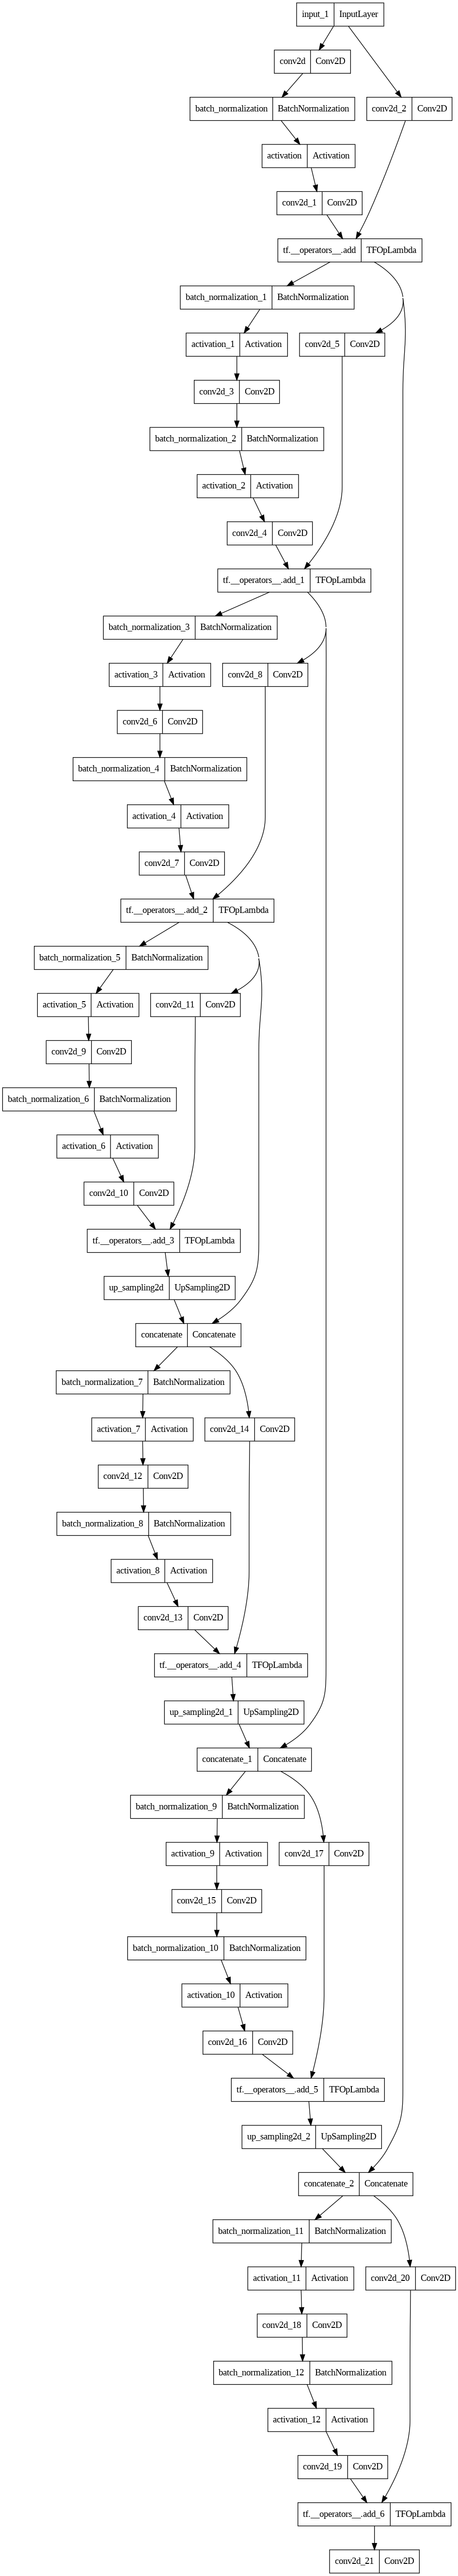

In [ ]:
from tensorflow.keras.utils import plot_model
model = build_resunet(input_shape=(128, 128, 1))
plot_model(model, to_file='model.png')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.6 MB/s eta 0:00:00


### PREPROCESSING

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(secciones_low_resized, secciones_full_resized, test_size=0.2, random_state=42)

train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)

optimizer = Adam(learning_rate=1.0e-4)
model = build_resunet(input_shape=(128, 128, 1))
model.compile(loss='MSE',optimizer=optimizer,metrics=['MAE'])

history = model.fit(train_generator, epochs=300, validation_data=(x_val, y_val))


Epoch 1/300
17/17 [==============================] - 52s 862ms/step - loss: 564585.8125 - MAE: 137.6449 - val_loss: 277288.8750 - val_MAE: 78.1167
Epoch 2/300
17/17 [==============================] - 8s 489ms/step - loss: 377618.8750 - MAE: 108.3660 - val_loss: 188948.7656 - val_MAE: 77.6863
Epoch 3/300
17/17 [==============================] - 8s 492ms/step - loss: 295996.7188 - MAE: 103.8337 - val_loss: 189439.5781 - val_MAE: 94.1156
Epoch 4/300
17/17 [==============================] - 8s 494ms/step - loss: 278889.5000 - MAE: 101.9951 - val_loss: 123792.6484 - val_MAE: 70.8328
Epoch 5/300
17/17 [==============================] - 8s 498ms/step - loss: 357837.2500 - MAE: 101.6151 - val_loss: 182283.7812 - val_MAE: 75.9114
Epoch 6/300
17/17 [==============================] - 9s 501ms/step - loss: 291646.8125 - MAE: 97.5497 - val_loss: 139698.9219 - val_MAE: 66.4843
Epoch 7/300
17/17 [==============================] - 9s 504ms/step - loss: 313470.4688 - MAE: 103.3512 - val_loss: 173071.12

In [ ]:
model.save("mi_modelo.h5") 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Nifty/FiltradoenPET64 (1).h5')

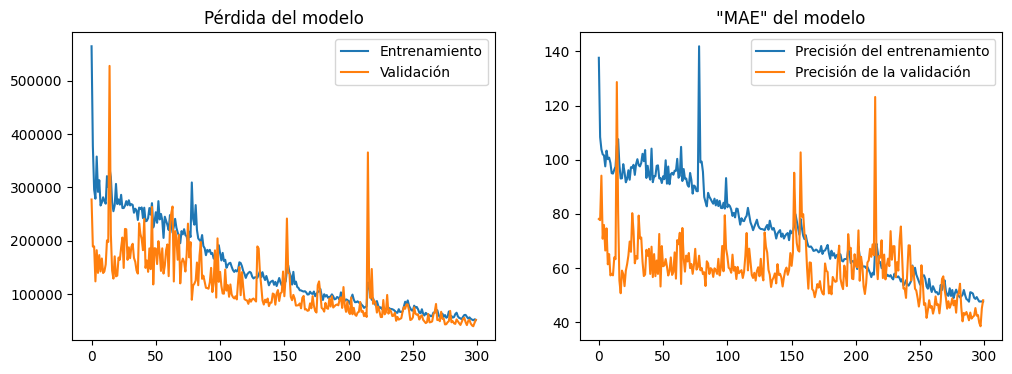

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
#plt.yscale('log')
plt.legend()
plt.title('Pérdida del modelo')

plt.subplot(1, 2, 2)
plt.plot(history.history['MAE'], label='Precisión del entrenamiento')
plt.plot(history.history['val_MAE'], label='Precisión de la validación')
#plt.yscale('log')
plt.legend()
plt.title('"MAE" del modelo')

plt.show()

5/5 [==============================] - 1s 162ms/step


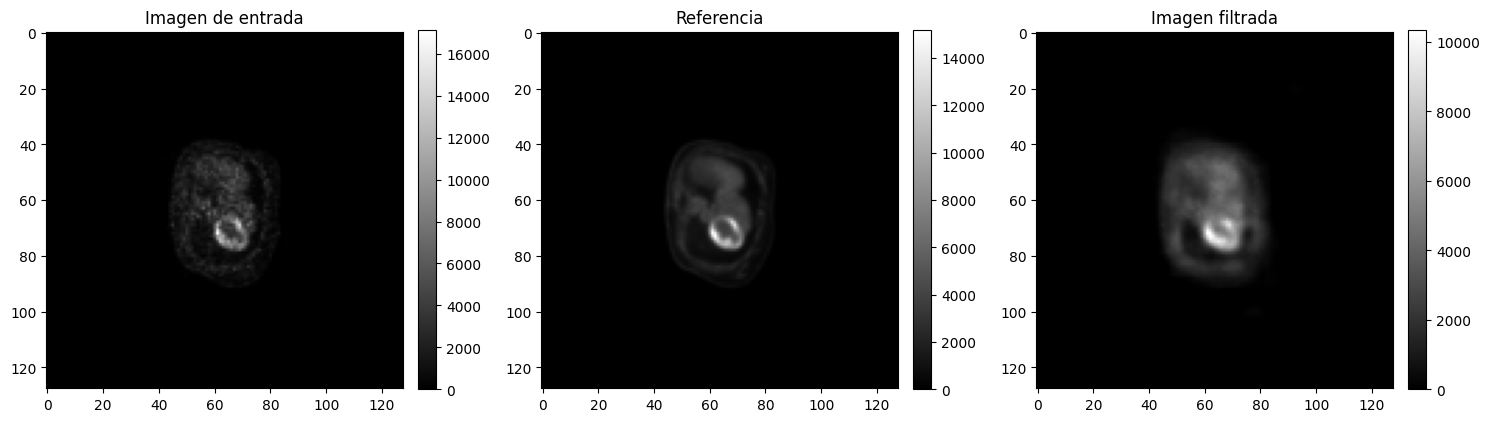

In [ ]:
y_pred = model.predict(x_val)
k = 10

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

img1 = axs[0].imshow(x_val[k,:,:], cmap='gray')

fig.colorbar(img1, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('Imagen de entrada')

img2 = axs[1].imshow(y_val[k,:,:], cmap='gray')

fig.colorbar(img2, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('Referencia')

img3 = axs[2].imshow(y_pred[k,:,:], cmap='gray')

fig.colorbar(img3, ax=axs[2], fraction=0.046, pad=0.04)
axs[2].set_title('Imagen filtrada')

fig.tight_layout()
plt.show()


In [ ]:
# Ejecuta la predicción en tu modelo
y_pred = model.predict(x_val)
k = 10

# Ejecuta la predicción en tu modelo para la imagen de entrada
pr_input = x_val[k,:,:]

# Remueve las dimensiones singulares
pred_input = np.squeeze(pr_input)

# Ejecuta la predicción en tu modelo para la imagen de referencia
pr_reference = y_val[k,:,:]

# Remueve las dimensiones singulares
pred_reference = np.squeeze(pr_reference)

# Ejecuta la predicción en tu modelo para la imagen filtrada
pr_filtered = y_pred[k,:,:]

# Remueve las dimensiones singulares
pred_filtered = np.squeeze(pr_filtered)

# Cambiar el tamaño de las imágenes a 440x440
input_resized = resize(pred_input, (440, 440), mode='reflect')
reference_resized = resize(pred_reference, (440, 440), mode='reflect')
filtered_resized = resize(pred_filtered, (440, 440), mode='reflect')


5/5 [==============================] - 1s 158ms/step


In [ ]:
pred_resized.shape

NameError: ignored

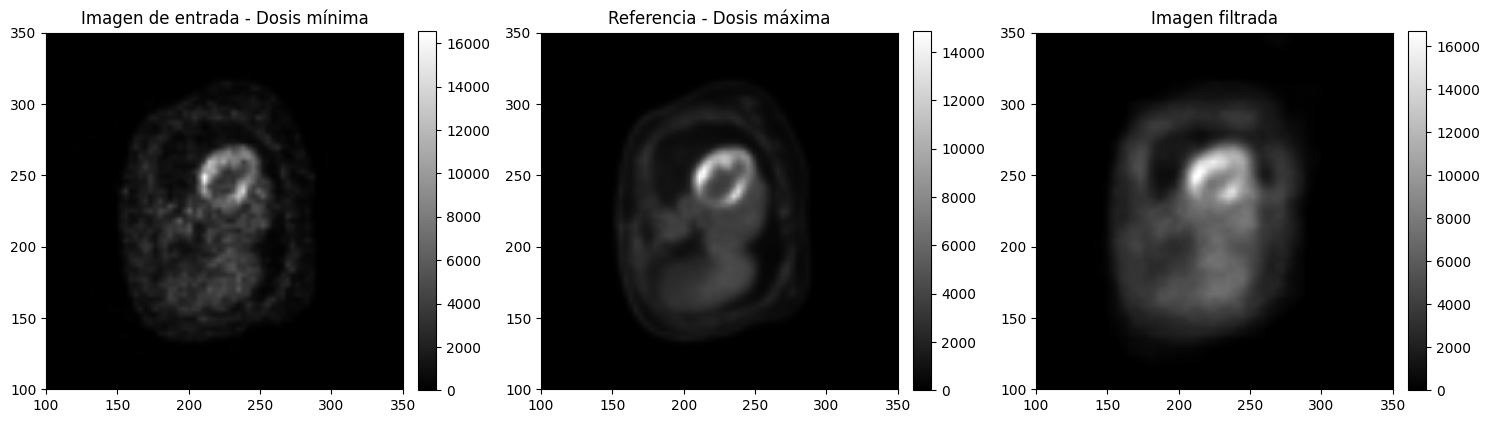

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Visualizar imagen original
im1 = axs[0].imshow(input_resized,cmap='gray')
axs[0].set_title('Imagen de entrada - Dosis mínima')
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_xlim(100, 350)
axs[0].set_ylim(100, 350)
# Visualizar referencia
im2 = axs[1].imshow(reference_resized,cmap='gray')
axs[1].set_title('Referencia - Dosis máxima')
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_xlim(100, 350)
axs[1].set_ylim(100, 350)
# Visualizar predicción
im3 = axs[2].imshow(filtered_resized*1.63,cmap='gray')
axs[2].set_title('Imagen filtrada')
fig.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04)
axs[2].set_xlim(100, 350)
axs[2].set_ylim(100, 350)
plt.tight_layout()
plt.show()


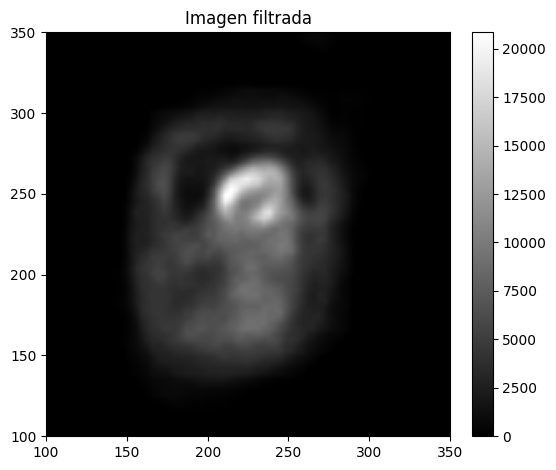

In [ ]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, axs = plt.subplots(1, 1)

# Visualizar la imagen
im = axs.imshow(filtered_resized * 1.63*1.25, cmap='gray')
axs.set_title('Imagen filtrada')

# Agregar barra de color
fig.colorbar(im, ax=axs, fraction=0.046, pad=0.04)

# Establecer límites de los ejes
axs.set_xlim(100, 350)
axs.set_ylim(100, 350)

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()


In [ ]:
# Transformada de Fourier de la imagen de entrada
fft_input = np.fft.fftshift(np.fft.fft2(input_resized))

# Transformada de Fourier de la imagen de referencia
fft_reference = np.fft.fftshift(np.fft.fft2(reference_resized))

# Transformada de Fourier de la imagen filtrada
fft_filtered = np.fft.fftshift(np.fft.fft2(filtered_resized*2.8))

def SNR(image,spectrum):
    c2 = np.abs(spectrum) ** 2
    n2 = np.mean(np.abs(np.fft.fft2(image[300:350, 100:150])) ** 2)
    s2 = c2 - n2
    snr = np.mean(np.abs(np.fft.fft2(image[150:300, 150:300])-n2))/n2
    s2[s2 < 0] = 0
    
    min_threshold = 1e-6
    c2 = np.maximum(c2, min_threshold)
    s2 = np.maximum(s2, min_threshold)
    
    c2_condition = c2 < s2
    c2[c2_condition] = s2[c2_condition]
    
    wiener_filter = s2 / c2
    filtered_image = spectrum * wiener_filter
    wiener_filter = np.maximum(wiener_filter, 0)
    snr = np.mean(s2)/n2
    return snr  
print("SNR de la imagen de entrada:",SNR(input_resized,fft_input))
print("SNR de la imagen de referencia:", SNR(reference_resized,fft_reference))
print("SNR de la imagen filtrada:", SNR(filtered_resized,fft_filtered)) 

SNR de la imagen de entrada: 6911720.261302016
SNR de la imagen de referencia: 145991374.76169837
SNR de la imagen filtrada: 26013262.579218827


In [ ]:

plt.plot(range(-220, 220), np.abs(filtered_resized)[170, mW-220:mW+220+1], color='teal', label='Dosis máxima')
plt.plot(range(-220, 220), np.abs(wiener_low_dose)[170, mW-220:mW+220+1], color='darkorange', label='D.minF.Wiener')
plt.plot(range(-220, 220), np.abs(gaussian_filtered_low_dose)[170, mW-220:mW+220+1], color='r', label='D.min F.gausiano')
plt.plot(range(-220, 220), np.abs(reference_resized)[170, mW-220:mW+220+1], color='purple', label='Seccion1transf')
plt.title("Dosis máxima vs dosis mínima filtrada")
plt.legend(loc='upper right')

plt.show()



In [ ]:
filtered_resized[170, 0:440]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [ ]:
# Guardar el array del perfil unidimensional en un archivo de texto
np.savetxt('perfilfIAdebescompararpana.txt', filtered_resized[170, 0:440]*1.63*1.25)

In [ ]:
np.savetxt('filtradaIAcomparar.txt', filtered_resized*1.63*1.25)
